# WNV EDA
### January 2022
Exploring the WNV data and looking for meaningful features for modelling.


In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
train = pd.read_csv('train_clean.csv', index_col=0, parse_dates=['Date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4616 entries, 0 to 4615
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    4616 non-null   datetime64[ns]
 1   Trap                    4616 non-null   object        
 2   Address                 4616 non-null   object        
 3   Block                   4616 non-null   int64         
 4   Street                  4616 non-null   object        
 5   AddressNumberAndStreet  4616 non-null   object        
 6   Latitude                4616 non-null   float64       
 7   Longitude               4616 non-null   float64       
 8   AddressAccuracy         4616 non-null   int64         
 9   NumMosquitos            4616 non-null   int64         
 10  WnvPresent              4616 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 432.8+ KB


In [20]:
weather = pd.read_csv('weather_wide_clean.csv', index_col=0, header=[0,1], parse_dates=True)

### flatten weather index for ease of plotting!
flatten = lambda x: x[1]+'_'+str(x[0])
weather.columns = list(map(flatten, weather.columns))

weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1472 entries, 2007-05-01 to 2014-10-31
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AvgSpeed_1     1472 non-null   float64
 1   CodeSum_1      1472 non-null   object 
 2   Cool_1         1472 non-null   float64
 3   Depart_1       1472 non-null   float64
 4   DewPoint_1     1472 non-null   int64  
 5   Heat_1         1472 non-null   float64
 6   PrecipTotal_1  1472 non-null   float64
 7   ResultDir_1    1472 non-null   int64  
 8   ResultSpeed_1  1472 non-null   float64
 9   SeaLevel_1     1472 non-null   float64
 10  SnowFall_1     1472 non-null   float64
 11  StnPressure_1  1472 non-null   float64
 12  Tavg_1         1472 non-null   float64
 13  Tmax_1         1472 non-null   int64  
 14  Tmin_1         1472 non-null   int64  
 15  AvgSpeed_2     1472 non-null   float64
 16  CodeSum_2      1472 non-null   object 
 17  Cool_2         1472 non-null   flo

In [21]:
spray = pd.read_csv('spray_clean.csv', parse_dates=['dateTime'])
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14194 entries, 0 to 14193
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dateTime   14194 non-null  datetime64[ns]
 1   Latitude   14194 non-null  float64       
 2   Longitude  14194 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 332.8 KB


In [22]:
### Get locations for mapping
spray_loc = spray[['Latitude','Longitude']].drop_duplicates()
train_loc = train[['Latitude','Longitude']].drop_duplicates()
station_lat = [41.995,41.786]
station_long = [-87.933,-87.752]


In [23]:
mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

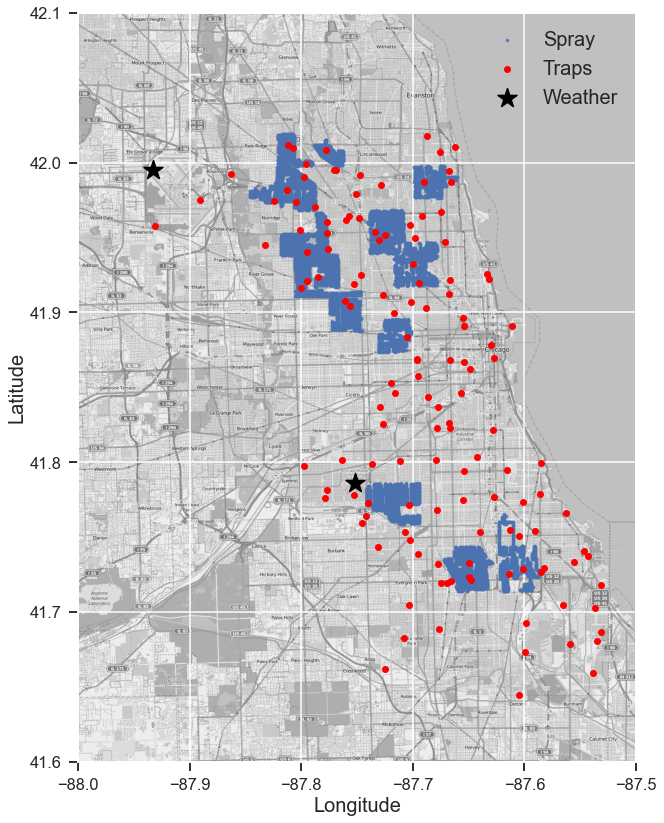

In [24]:
###  Plot mosquito traps data 

plt.figure(figsize=(10,14))
plt.imshow(mapdata,cmap=plt.get_cmap('gray'),extent=lon_lat_box,aspect=aspect)

plt.scatter(x=spray_loc.Longitude, y=spray_loc.Latitude, alpha=.7, s=5)
plt.scatter(x=train_loc.Longitude, y=train_loc.Latitude, color='red', s=30)
plt.scatter(x=station_long, y=station_lat, s=400, color='black', marker='*')
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.legend(labels = ['Spray','Traps','Weather'],loc='upper right',\
           fontsize=20)

plt.show()

In [25]:
import matplotlib as mpl
mpl.style.use('seaborn')
sns.set_context("talk")

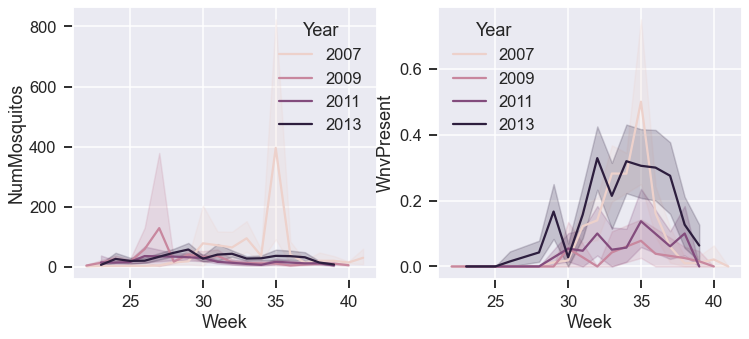

In [26]:
train['Week'] = train.Date.dt.isocalendar().week
train['Month'] = train.Date.dt.month
train['Year'] = train.Date.dt.year


fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(data=train, x='Week',y='NumMosquitos',hue='Year',ax=ax[0])
sns.lineplot(data=train, x='Week',y='WnvPresent',hue='Year',ax=ax[1])

plt.show()

The above plot shows the number of mosquitos caught in traps and the prevelance of WNV+ test through each summer colored by year.  

It looks like most positive cases occur between weeks 30-38.  2013 and 2007 looked like particularly bad years for west nile virus.  I will see what weather patterns are different for those two years.  

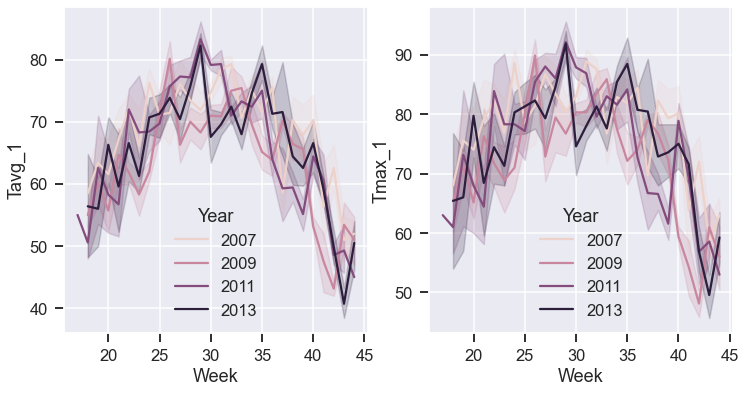

In [27]:
weather['Year'] = weather.index.year
weather['Week'] = weather.index.isocalendar().week

fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.lineplot(data = weather[weather.Year.isin([2007,2009,2011,2013])], x='Week', y='Tavg_1', hue='Year', ax=ax[0])
sns.lineplot(data = weather[weather.Year.isin([2007,2009,2011,2013])], x='Week', y='Tmax_1', hue='Year', ax=ax[1])

plt.show()


There doesn't look to be a big difference in temperature during weeks 30-38 in those years identified above. Let's look at precipitation.

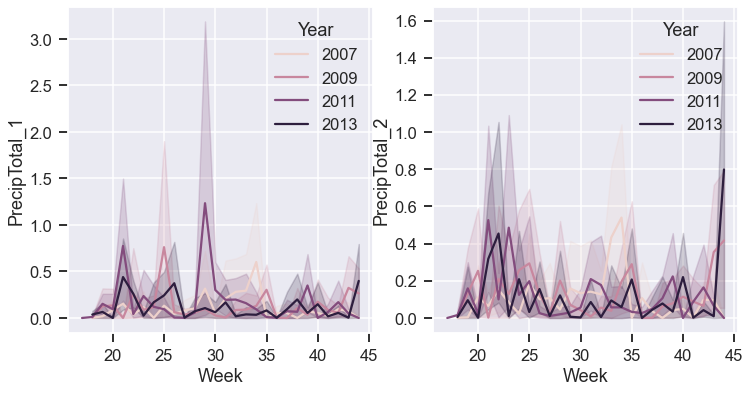

In [28]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.lineplot(data = weather[weather.Year.isin([2007,2009,2011,2013])], x='Week', y='PrecipTotal_1', hue='Year', ax=ax[0])
sns.lineplot(data = weather[weather.Year.isin([2007,2009,2011,2013])], x='Week', y='PrecipTotal_2', hue='Year', ax=ax[1])

plt.show()


It's tough to see anything from here.

Chicago is called the windy city. I imagine wind strength would be a problem for mosquitos.  Let's take a look

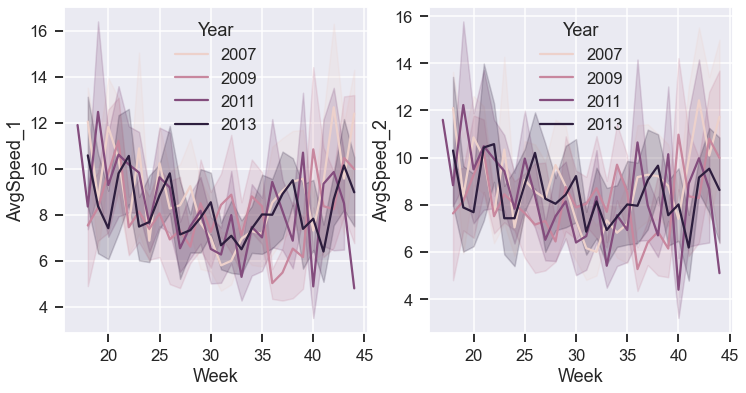

In [29]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.lineplot(data = weather[weather.Year.isin([2007,2009,2011,2013])], x='Week', y='AvgSpeed_1', hue='Year', ax=ax[0])
sns.lineplot(data = weather[weather.Year.isin([2007,2009,2011,2013])], x='Week', y='AvgSpeed_2', hue='Year', ax=ax[1])

plt.show()

Those weeks do have a lower average wind speed than the rest of the summer.  But years 2007 and 2013 do not stand out significantly here.  

In [30]:
[i for i in weather.columns if '_1' in i]

['AvgSpeed_1',
 'CodeSum_1',
 'Cool_1',
 'Depart_1',
 'DewPoint_1',
 'Heat_1',
 'PrecipTotal_1',
 'ResultDir_1',
 'ResultSpeed_1',
 'SeaLevel_1',
 'SnowFall_1',
 'StnPressure_1',
 'Tavg_1',
 'Tmax_1',
 'Tmin_1',
 'Daylight_1',
 'Latitude_1',
 'Longitude_1']

I think some of the weather features might be redundant.  Let's take a look. 

AvgSpeed and ResultSpeed

In [31]:
from scipy.stats import pearsonr
r,p = pearsonr(weather['AvgSpeed_1'], weather['ResultSpeed_1'])
print(f'Pearson r: {r:.3f}')
print(f'Pvalue: {p:.3f}')

Pearson r: 0.912
Pvalue: 0.000


In [33]:
from itertools import combinations
combos = combinations(['Tavg_1','Tmin_1','Tmax_1'],2)
for c1,c2 in combos:
    r,p = pearsonr(weather[c1], weather[c2])
    print(c1,c2)
    print(f'Pearson r: {r:.3f}')
    print(f'Pvalue: {p:.3f}')
    print()

Tavg_1 Tmin_1
Pearson r: 0.958
Pvalue: 0.000

Tavg_1 Tmax_1
Pearson r: 0.966
Pvalue: 0.000

Tmin_1 Tmax_1
Pearson r: 0.852
Pvalue: 0.000



There are very high correlations between some of these features.  I will keep all of them for now, but will probably end up dropping some before modelling. 

Before merging the weather with the trap data I need to look at the categorical weather column to see if it provides information that all of the numerical columns don't.  I'll start by making binary columns of all the weather codes

In [34]:
all_codes = list(set(weather.CodeSum_1.unique()).union(set(weather.CodeSum_2)))
codes = set()
for c in all_codes:
    codes = codes.union(set(c.split(' ')))
codes.remove('')

### Drop + and - designations for codes 
codes = [c for c in codes if '+' not in c and '-' not in c]


for c in codes:
    for station in [1,2]:
        weather[c+f'_{station}'] = np.where(weather[f'CodeSum_{station}'].str.contains(c), 1, 0)

weather.drop(['CodeSum_1', 'CodeSum_2'], axis=1, inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1472 entries, 2007-05-01 to 2014-10-31
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AvgSpeed_1     1472 non-null   float64
 1   Cool_1         1472 non-null   float64
 2   Depart_1       1472 non-null   float64
 3   DewPoint_1     1472 non-null   int64  
 4   Heat_1         1472 non-null   float64
 5   PrecipTotal_1  1472 non-null   float64
 6   ResultDir_1    1472 non-null   int64  
 7   ResultSpeed_1  1472 non-null   float64
 8   SeaLevel_1     1472 non-null   float64
 9   SnowFall_1     1472 non-null   float64
 10  StnPressure_1  1472 non-null   float64
 11  Tavg_1         1472 non-null   float64
 12  Tmax_1         1472 non-null   int64  
 13  Tmin_1         1472 non-null   int64  
 14  AvgSpeed_2     1472 non-null   float64
 15  Cool_2         1472 non-null   float64
 16  Depart_2       1472 non-null   float64
 17  DewPoint_2     1472 non-null   int

Now the codes are captured as binary columns in the data.  Time for a quick look at some of the features

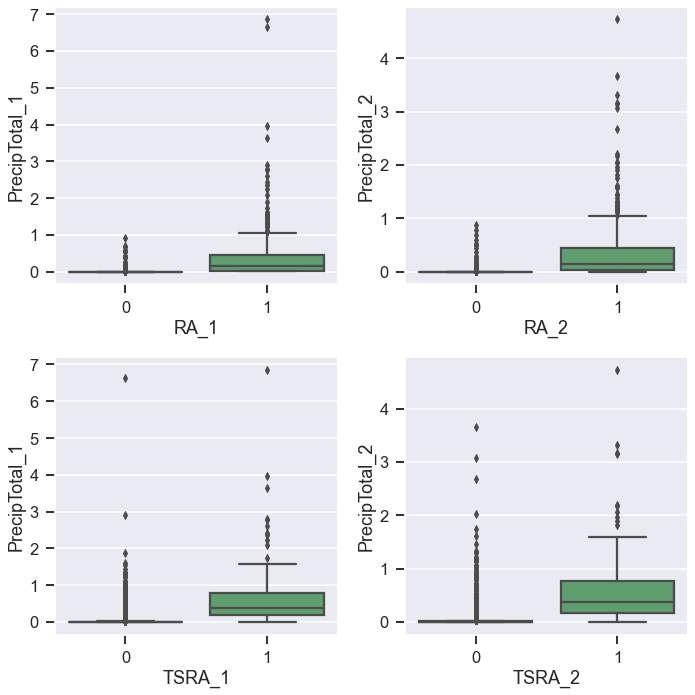

In [37]:
fig, ax = plt.subplots(2,2, figsize=(10,10), tight_layout=True)
#
sns.boxplot(data=weather, x='RA_1', y='PrecipTotal_1', ax=ax[0][0])
sns.boxplot(data=weather, x='RA_2', y='PrecipTotal_2', ax=ax[0][1])
sns.boxplot(data=weather, x='TSRA_1', y='PrecipTotal_1', ax=ax[1][0])
sns.boxplot(data=weather, x='TSRA_2', y='PrecipTotal_2', ax=ax[1][1])

plt.show()

There are some small precipitation values with a `RA` of 0, and there are more precipitation values with an `TSRA` of 0.  But it is moslty what I expected.

Now looking at histograms for outliers

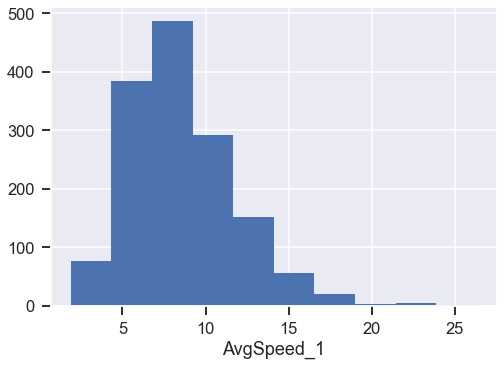

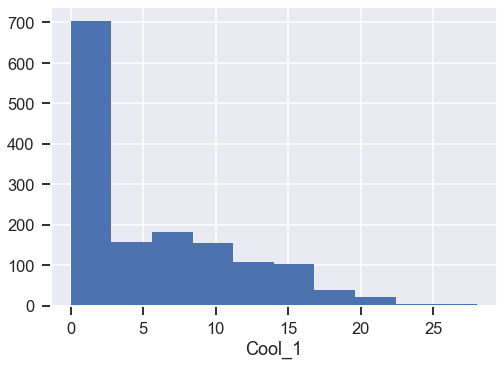

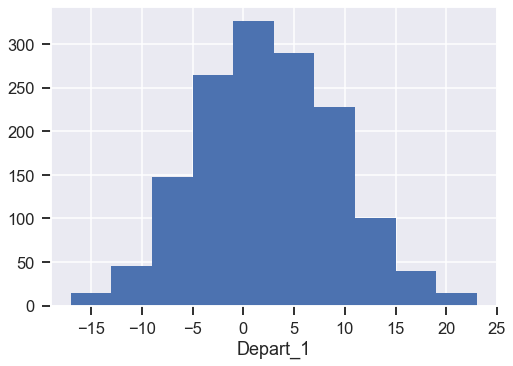

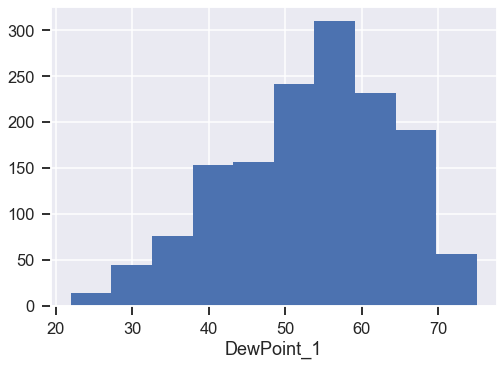

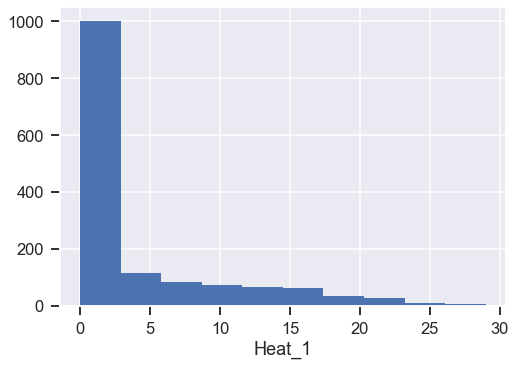

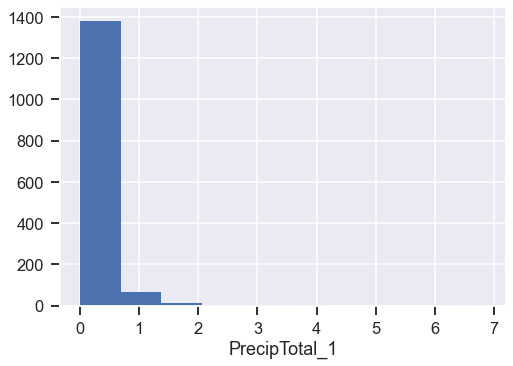

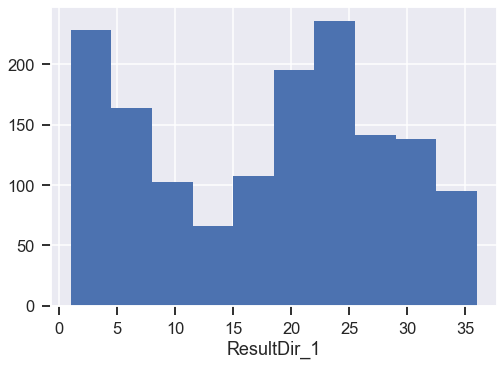

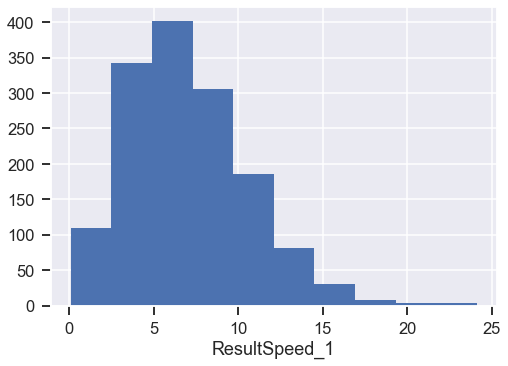

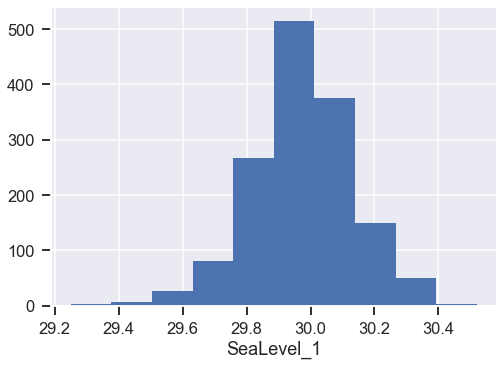

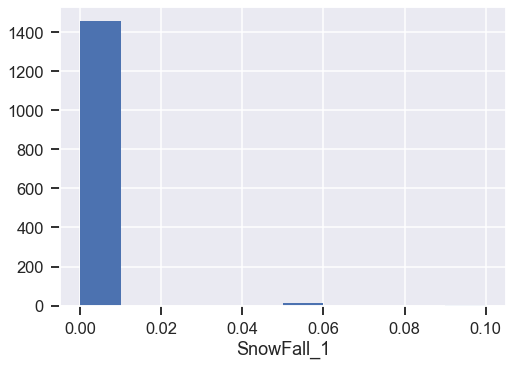

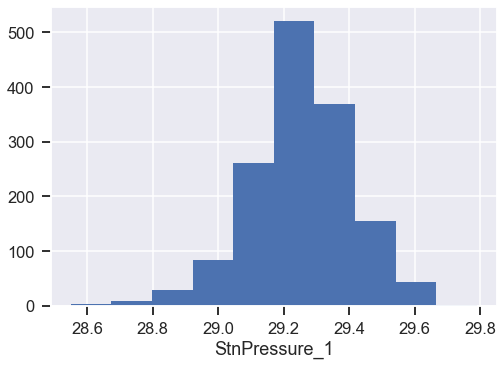

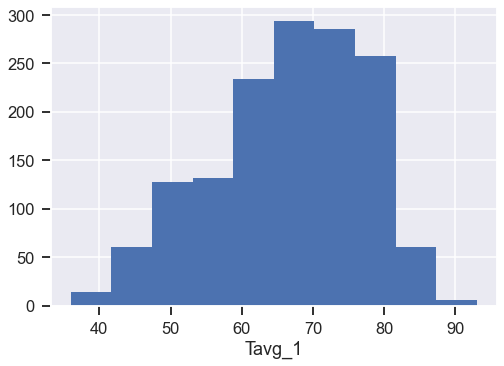

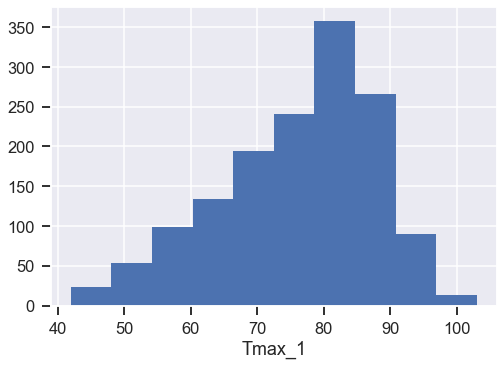

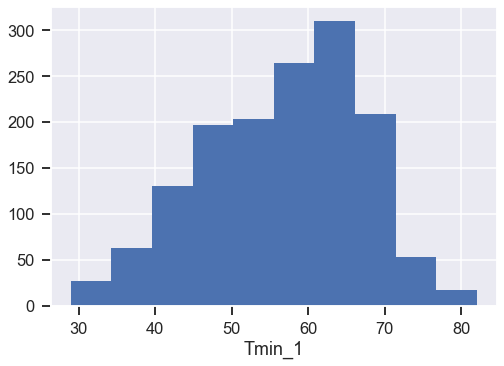

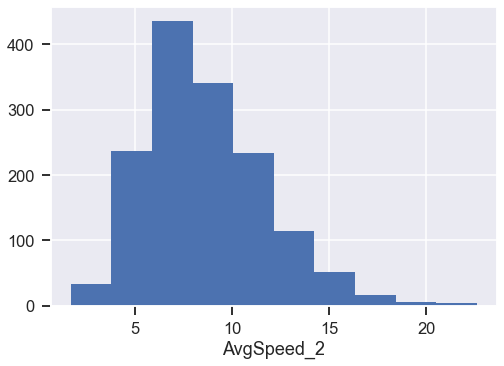

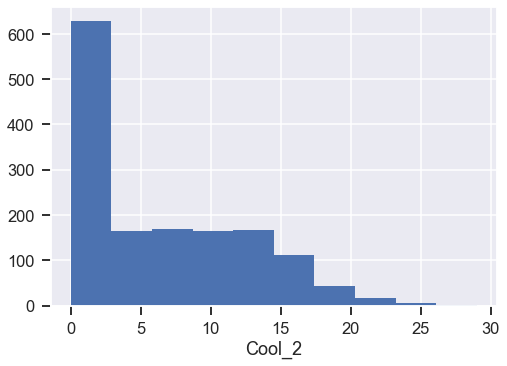

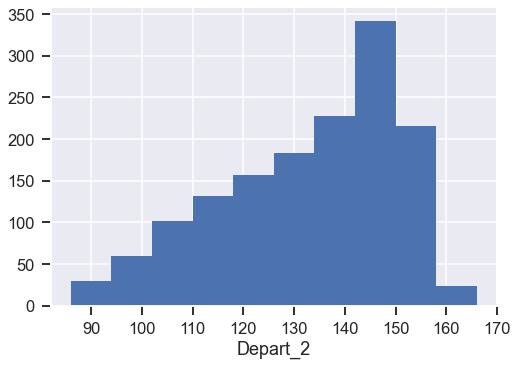

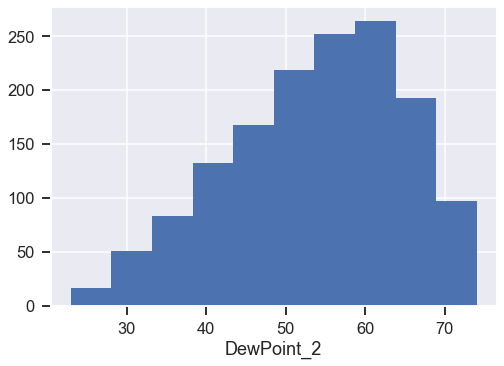

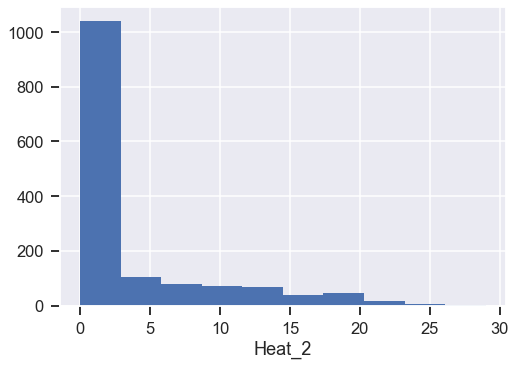

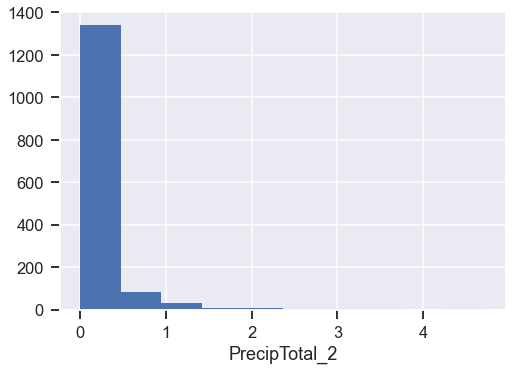

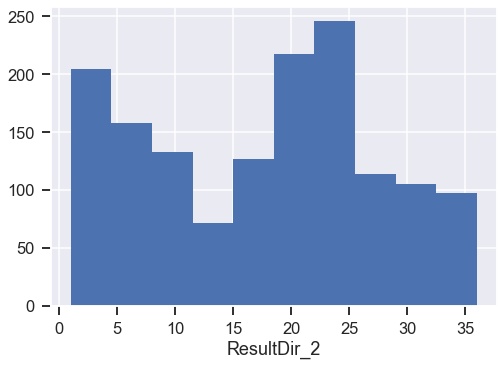

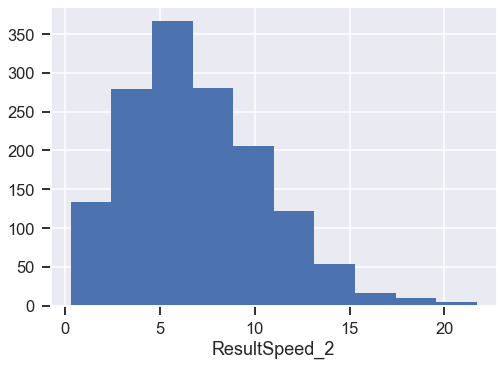

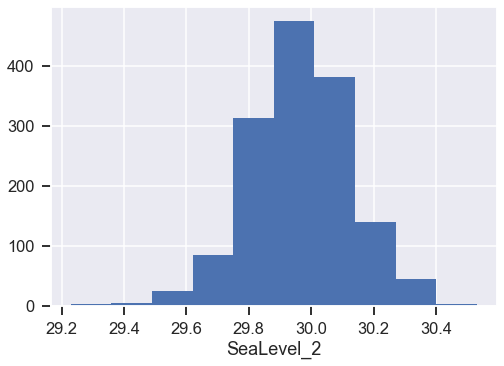

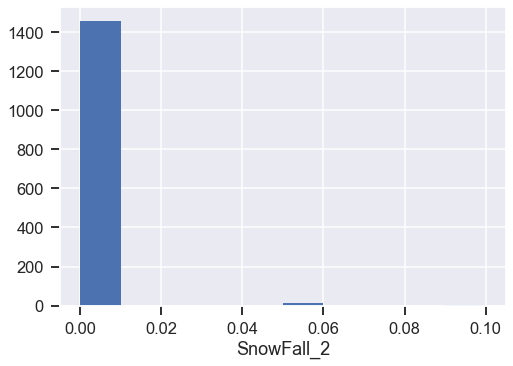

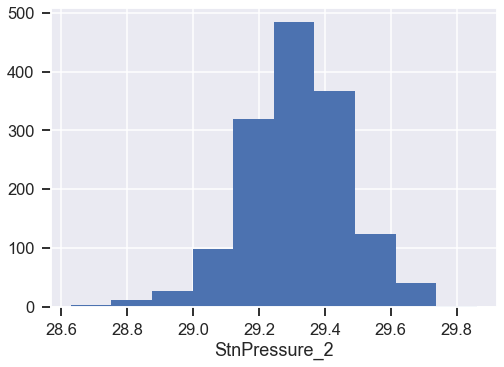

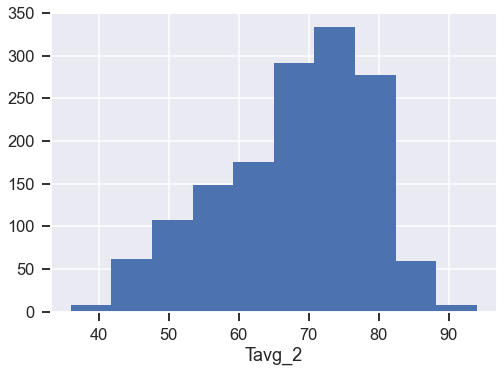

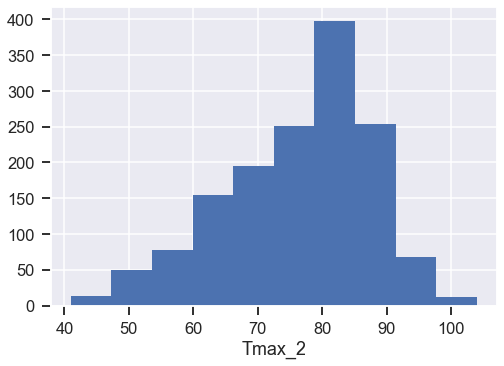

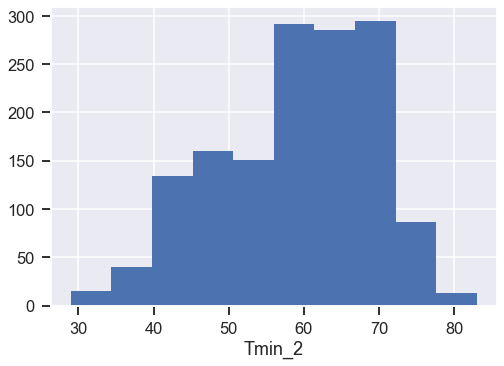

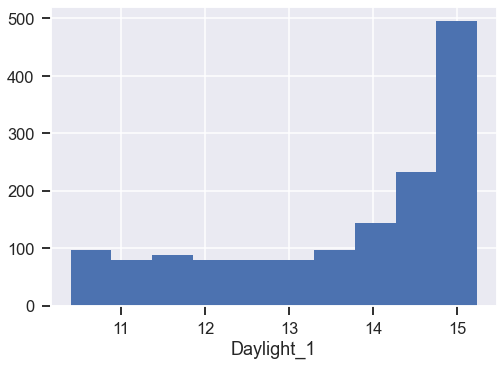

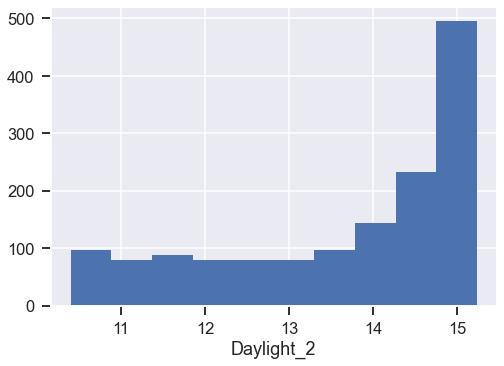

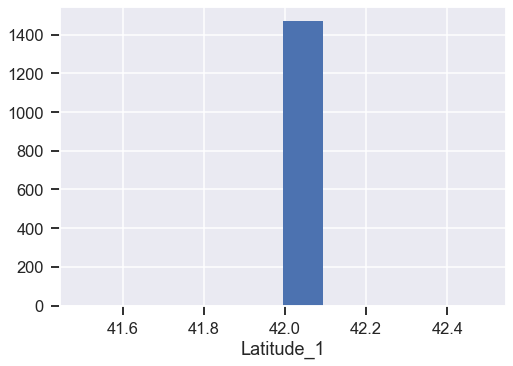

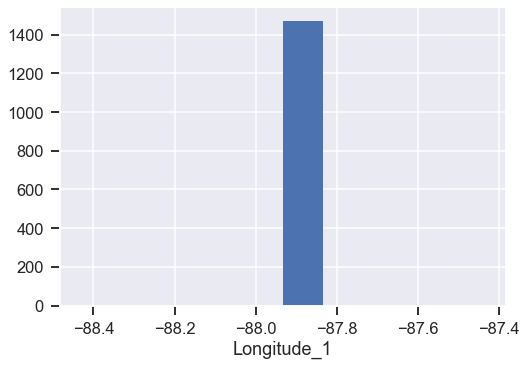

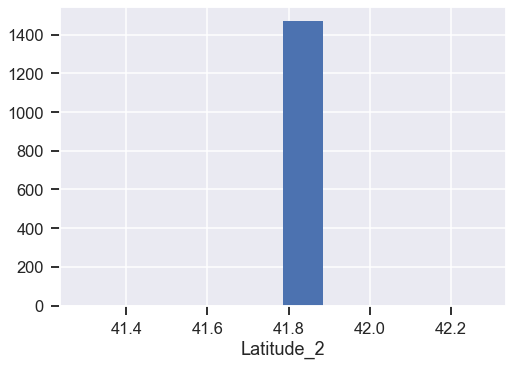

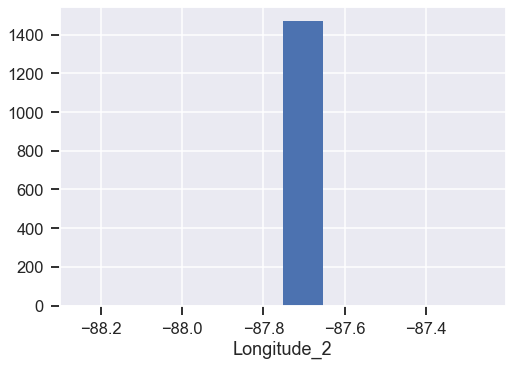

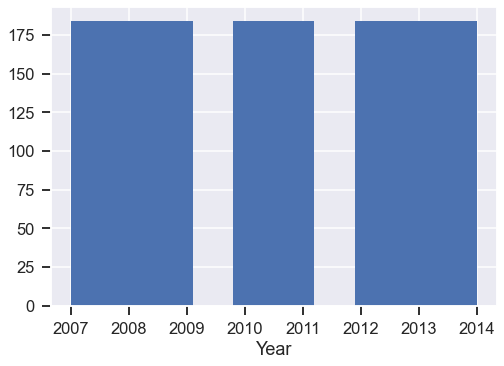

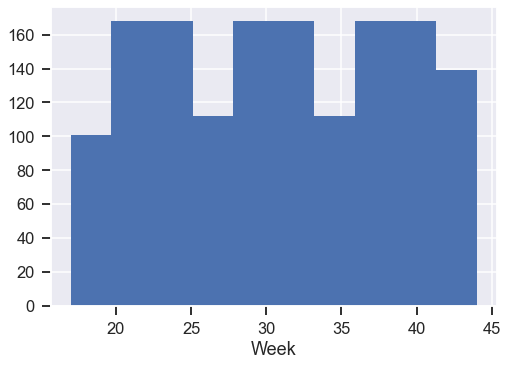

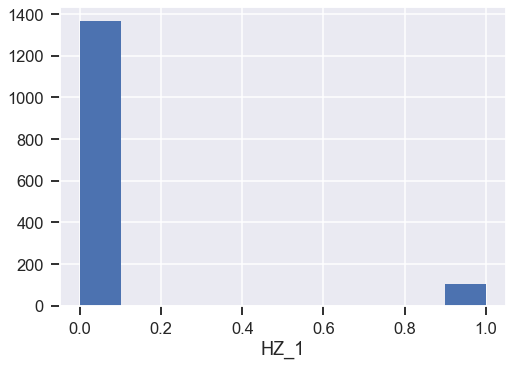

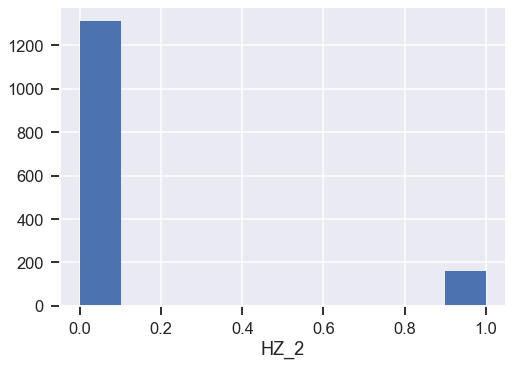

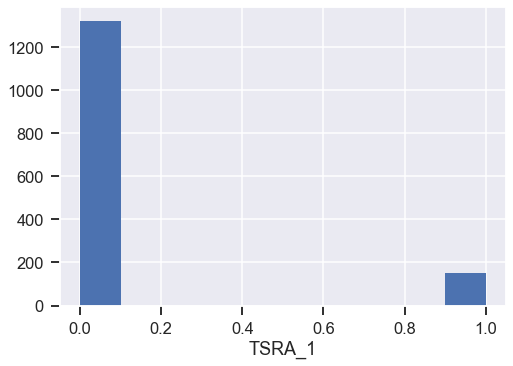

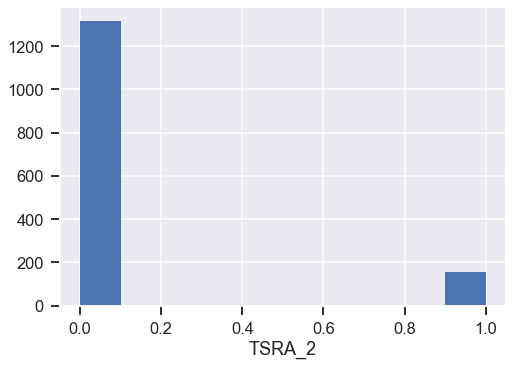

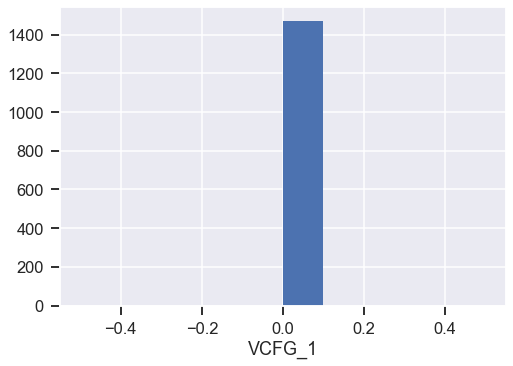

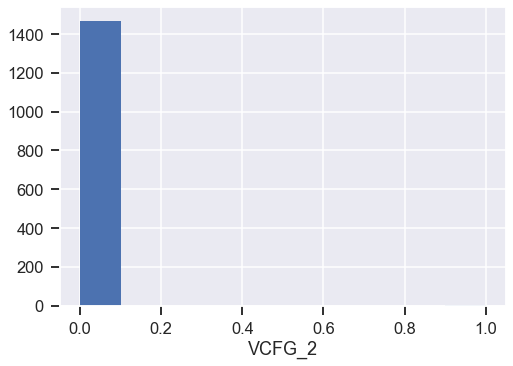

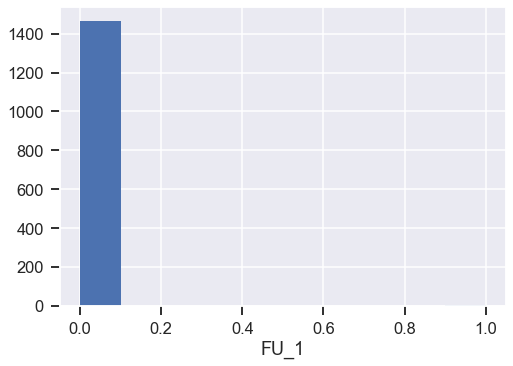

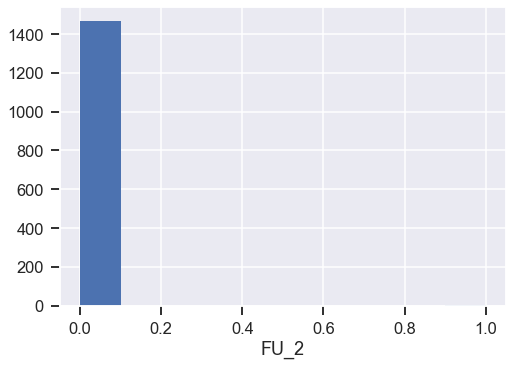

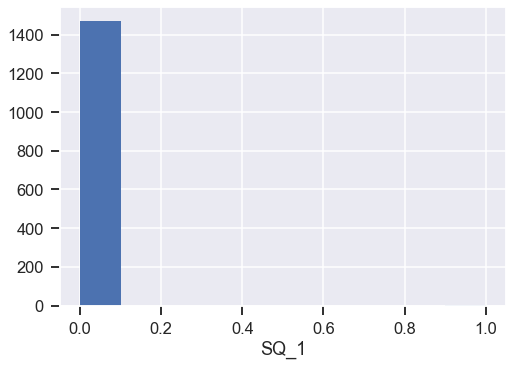

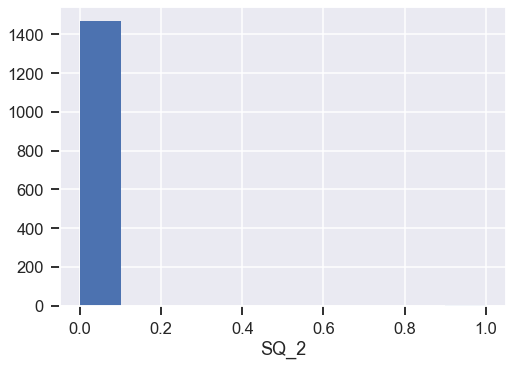

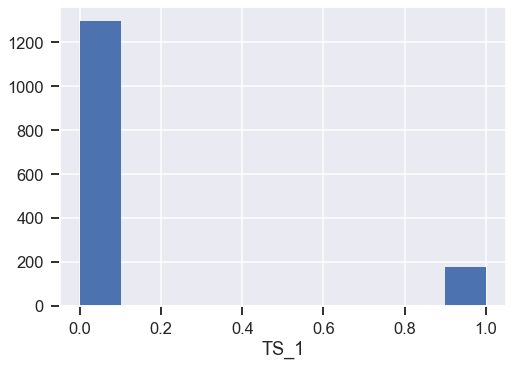

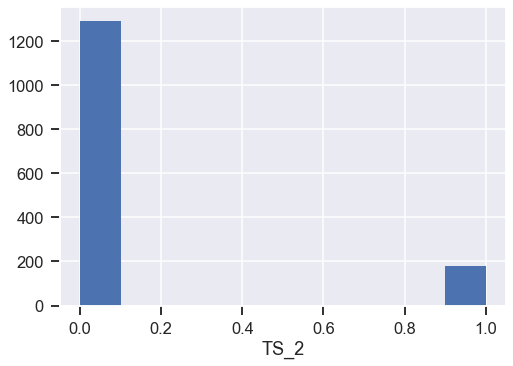

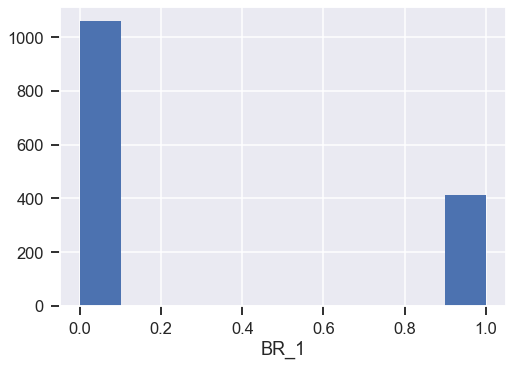

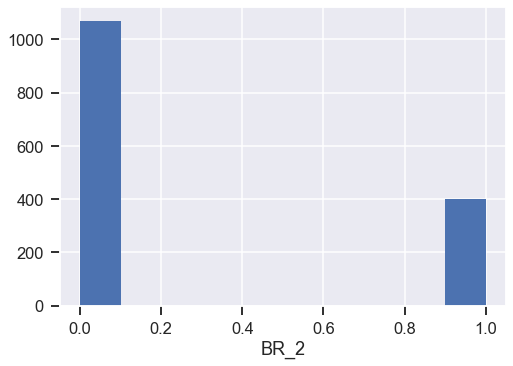

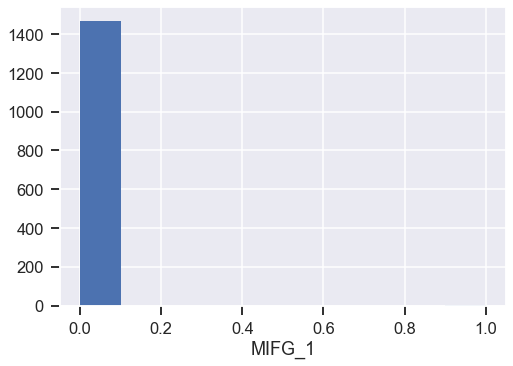

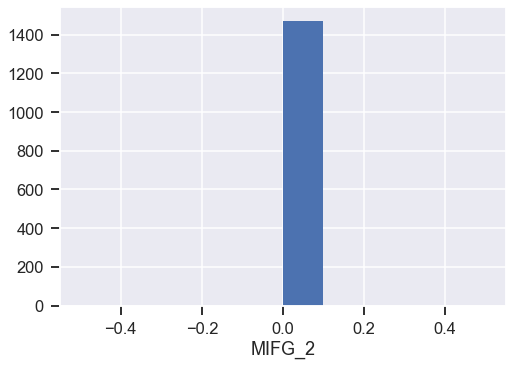

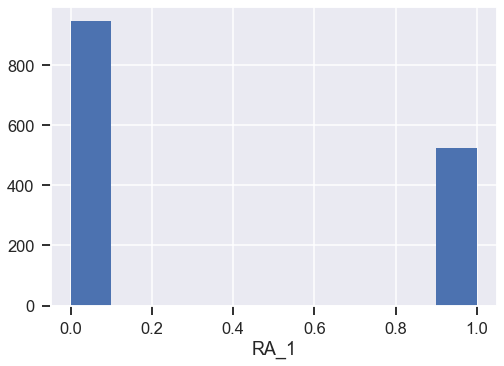

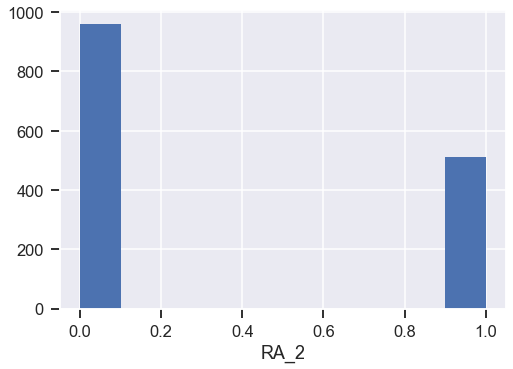

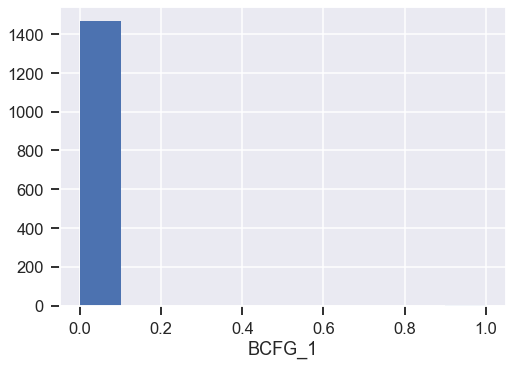

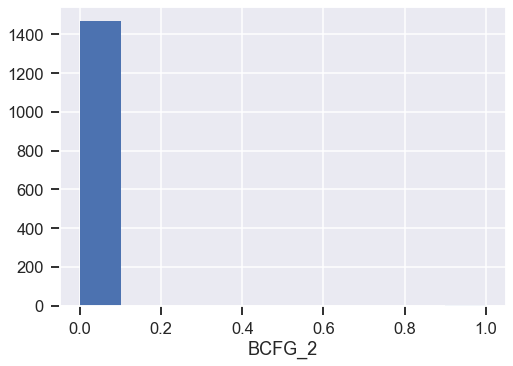

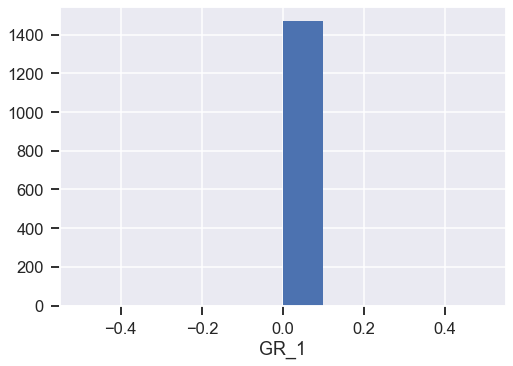

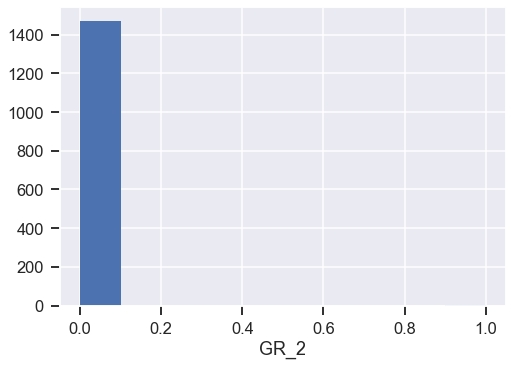

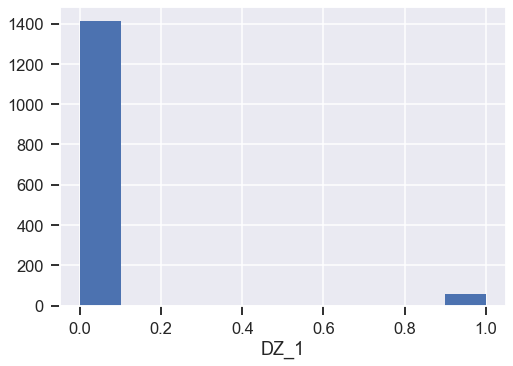

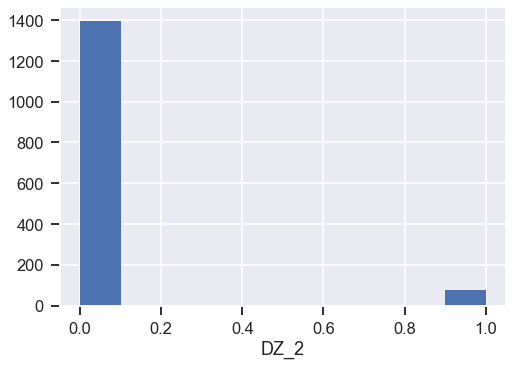

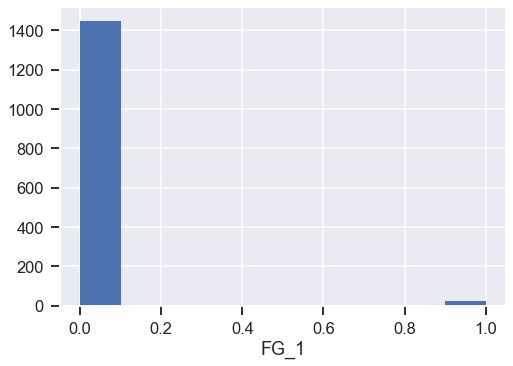

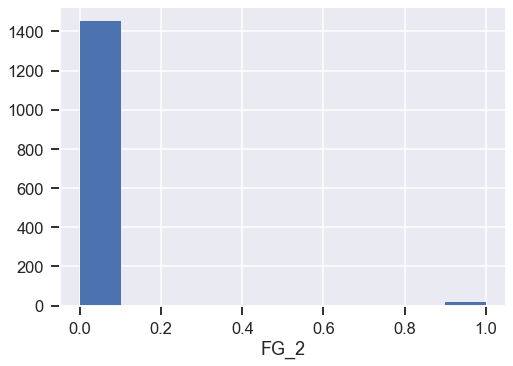

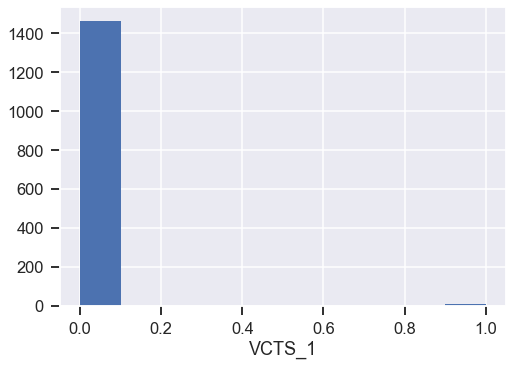

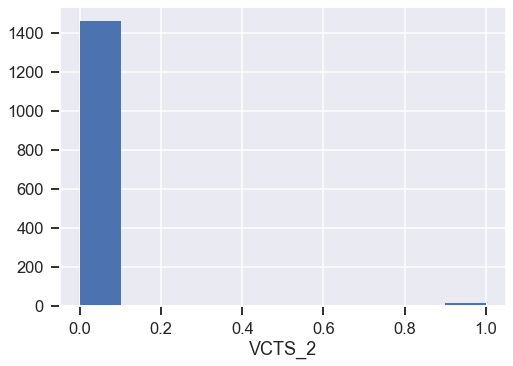

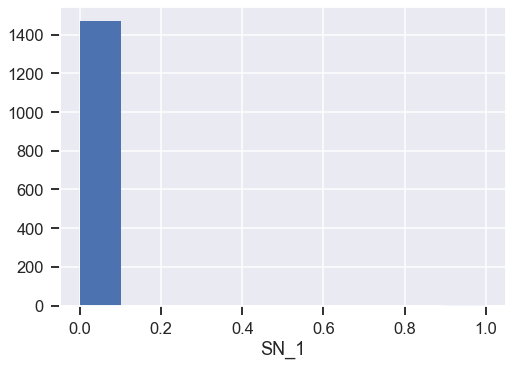

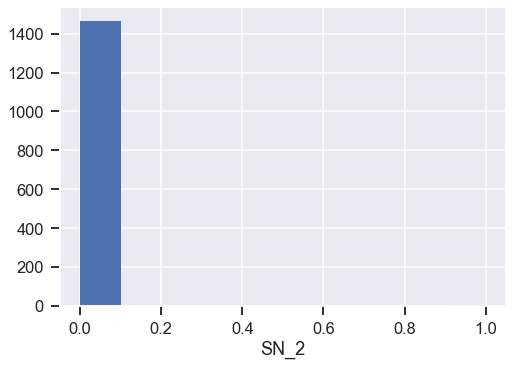

In [38]:
### looking for outliers
for c in weather.columns:
    weather[c].hist()
    plt.xlabel(c)
    plt.show()

Most of the above plots look fine.  `Heat`, `Cool`, and `PrecipTotal` are very not-normal though.  Perhaps these should be transformed at some point.

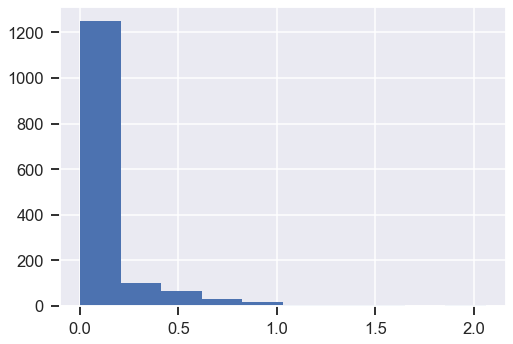

In [39]:
#weather['PrecipTotal_1'].hist()
plt.hist(x=np.log(weather['PrecipTotal_1'].to_numpy()+1));

### Create lag variables in weather data 
I expect the key to this problem is the weather patterns in days immediately before the trap is collected.  I will create lagged weather features now. 

In [40]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1472 entries, 2007-05-01 to 2014-10-31
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AvgSpeed_1     1472 non-null   float64
 1   Cool_1         1472 non-null   float64
 2   Depart_1       1472 non-null   float64
 3   DewPoint_1     1472 non-null   int64  
 4   Heat_1         1472 non-null   float64
 5   PrecipTotal_1  1472 non-null   float64
 6   ResultDir_1    1472 non-null   int64  
 7   ResultSpeed_1  1472 non-null   float64
 8   SeaLevel_1     1472 non-null   float64
 9   SnowFall_1     1472 non-null   float64
 10  StnPressure_1  1472 non-null   float64
 11  Tavg_1         1472 non-null   float64
 12  Tmax_1         1472 non-null   int64  
 13  Tmin_1         1472 non-null   int64  
 14  AvgSpeed_2     1472 non-null   float64
 15  Cool_2         1472 non-null   float64
 16  Depart_2       1472 non-null   float64
 17  DewPoint_2     1472 non-null   int

In [41]:
weather.drop(['Year','Week','Latitude_1','Longitude_1','Latitude_2','Longitude_2'],
             axis = 1,
             inplace=True)

In [42]:
cols = list(weather.columns)
dontlag = ['Daylight_1','Daylight_2']

[cols.remove(c) for c in dontlag]
print(cols)

['AvgSpeed_1', 'Cool_1', 'Depart_1', 'DewPoint_1', 'Heat_1', 'PrecipTotal_1', 'ResultDir_1', 'ResultSpeed_1', 'SeaLevel_1', 'SnowFall_1', 'StnPressure_1', 'Tavg_1', 'Tmax_1', 'Tmin_1', 'AvgSpeed_2', 'Cool_2', 'Depart_2', 'DewPoint_2', 'Heat_2', 'PrecipTotal_2', 'ResultDir_2', 'ResultSpeed_2', 'SeaLevel_2', 'SnowFall_2', 'StnPressure_2', 'Tavg_2', 'Tmax_2', 'Tmin_2', 'HZ_1', 'HZ_2', 'TSRA_1', 'TSRA_2', 'VCFG_1', 'VCFG_2', 'FU_1', 'FU_2', 'SQ_1', 'SQ_2', 'TS_1', 'TS_2', 'BR_1', 'BR_2', 'MIFG_1', 'MIFG_2', 'RA_1', 'RA_2', 'BCFG_1', 'BCFG_2', 'GR_1', 'GR_2', 'DZ_1', 'DZ_2', 'FG_1', 'FG_2', 'VCTS_1', 'VCTS_2', 'SN_1', 'SN_2']


In [43]:
def CreateLagFeatures(df, features, lag_range = 10):
    """
    """
    for feat in features:
        for day in range(1, 1+lag_range):
            df[feat+f'_lag{day}'] = df[feat].shift(day)
    
    return df.copy()

In [44]:
weather_lagged = CreateLagFeatures(weather,cols)
weather_lagged.shape

C:\Users\blain\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


(1472, 640)

Lagged features are created and now the weather table is a __lot__ wider.  When merged with training set half the number of features will be halved though. Speaking of...

## Merge weather and train
This will be tricky.  I want to merge the weather to the training set and only keep the weighted average of the features based on distance to each weather station.  

In [45]:
def Haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=3956):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)
    
    BCM edit:
    --
    Returns great circle distance in miles
    
    Only good for small distances, assumes earth is perfect sphere I believe
    --
    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [46]:
### Add station lat longs for distance calculation and then drop station location

train['s1_lat'] = 41.995
train['s1_long'] = -87.933

train['s2_lat'] = 41.786
train['s2_long'] = -87.752

train['Distance1'] =  Haversine(train['Latitude'], train['Longitude'], train['s1_lat'], train['s1_long'])
train['Distance2'] =  Haversine(train['Latitude'], train['Longitude'], train['s2_lat'], train['s2_long'])

train.drop(['s1_lat', 's1_long', 's2_lat', 's2_long'], axis=1, inplace=True)

train.head()

Date  Trap                                            Address  Block  \
0 2007-05-29  T002  4100 North Oak Park Avenue, Chicago, IL 60634,...     41   
1 2007-05-29  T007  6200 North Mandell Avenue, Chicago, IL 60646, USA     62   
2 2007-05-29  T015    7900 West Foster Avenue, Chicago, IL 60656, USA     79   
3 2007-05-29  T045   1500 West Webster Avenue, Chicago, IL 60614, USA     15   
4 2007-05-29  T046     2500 West Grand Avenue, Chicago, IL 60654, USA     25   

            Street             AddressNumberAndStreet   Latitude  Longitude  \
0   N OAK PARK AVE  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
1    N MANDELL AVE   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279   
2     W FOSTER AVE    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
3    W WEBSTER AVE   1500  W WEBSTER AVE, Chicago, IL  41.921600 -87.666455   
4      W GRAND AVE     2500  W GRAND AVE, Chicago, IL  41.891118 -87.654491   

   AddressAccuracy  NumMosquitos  WnvPresent  Week  Month  Year  Distance1  \
0                9             2         0.0    22      5  2007   7.325456   
1                9             1         0.0    22      5  2007   8.401282   
2                8             5         0.0    22      5  2007   5.737182   
3                8             2         0.0    22      5  2007  14.593754   
4                8             1         0.0    22      5  2007  16.000875   

   Distance2  
0  11.916496  
1  14.457136  
2  13.515305  
3  10.344661  
4   8.822498

In [47]:
s1_cols = [i for i in weather.columns if '_1' in i]
s2_cols = [i for i in weather.columns if '_2' in i]

s1_cols.sort()
s2_cols.sort()
print(len(s1_cols)==len(s2_cols))

True


In [48]:
records=[]

for i in range(train.shape[0]):
#i=1
    date = train.iloc[i]['Date']

    s1_distance = train.iloc[i]['Distance1']
    s2_distance = train.iloc[i]['Distance2']

    s1_w = s1_distance / (s1_distance + s2_distance)
    s2_w = s2_distance / (s1_distance + s2_distance)
    

    records.append(weather.loc[date][s1_cols].to_numpy() * s1_w + weather.loc[date][s2_cols].to_numpy() * s2_w)
    
w_cols = [i.replace('_1','') for i in s1_cols]
records = pd.DataFrame(records, columns=w_cols)

if train.shape[0]==records.shape[0]:
    train = pd.concat([train,records], axis = 1)
train.head()

Date  Trap                                            Address  Block  \
0 2007-05-29  T002  4100 North Oak Park Avenue, Chicago, IL 60634,...     41   
1 2007-05-29  T007  6200 North Mandell Avenue, Chicago, IL 60646, USA     62   
2 2007-05-29  T015    7900 West Foster Avenue, Chicago, IL 60656, USA     79   
3 2007-05-29  T045   1500 West Webster Avenue, Chicago, IL 60614, USA     15   
4 2007-05-29  T046     2500 West Grand Avenue, Chicago, IL 60654, USA     25   

            Street             AddressNumberAndStreet   Latitude  Longitude  \
0   N OAK PARK AVE  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
1    N MANDELL AVE   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279   
2     W FOSTER AVE    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
3    W WEBSTER AVE   1500  W WEBSTER AVE, Chicago, IL  41.921600 -87.666455   
4      W GRAND AVE     2500  W GRAND AVE, Chicago, IL  41.891118 -87.654491   

   AddressAccuracy  NumMosquitos  ...  VCTS_lag1  VCTS_lag10  VCTS_lag2  \
0                9             2  ...        0.0         0.0        0.0   
1                9             1  ...        0.0         0.0        0.0   
2                8             5  ...        0.0         0.0        0.0   
3                8             2  ...        0.0         0.0        0.0   
4                8             1  ...        0.0         0.0        0.0   

   VCTS_lag3  VCTS_lag4  VCTS_lag5  VCTS_lag6  VCTS_lag7  VCTS_lag8  VCTS_lag9  
0        0.0        0.0        0.0        0.0        0.0        0.0   0.380702  
1        0.0        0.0        0.0        0.0        0.0        0.0   0.367536  
2        0.0        0.0        0.0        0.0        0.0        0.0   0.297997  
3        0.0        0.0        0.0        0.0        0.0        0.0   0.585192  
4        0.0        0.0        0.0        0.0        0.0        0.0   0.644589  

[5 rows x 336 columns]

... and boom goes the dynamite.  

The above  does:
- calculates a station weight based on distance for each location
- calculates a weighted average of all weather features on that day based on station to trap distance
- Concatenates all of the weather data for those dates and locations to the training set

There are now 319 columns in the training set, and I can start to explore the effect of weather on the number of mosquitos in traps and WNV+ cases.

## Exploring the data


In [49]:
suf = ['']+[f'_lag{i}' for i in range(1,11)]

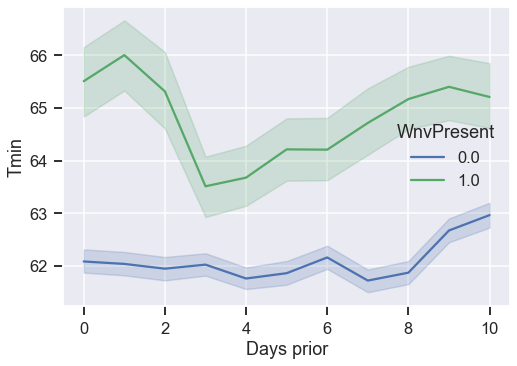

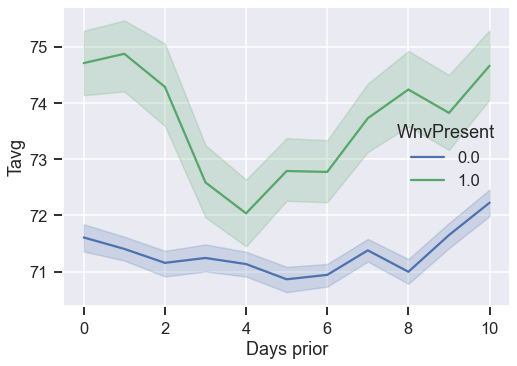

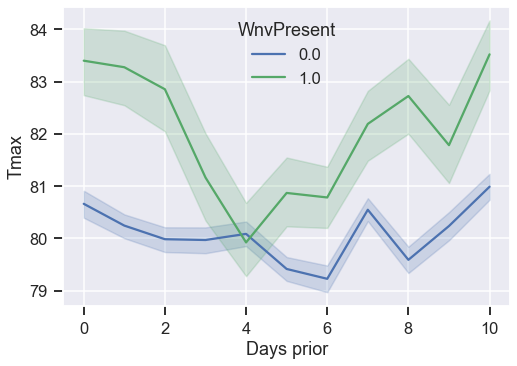

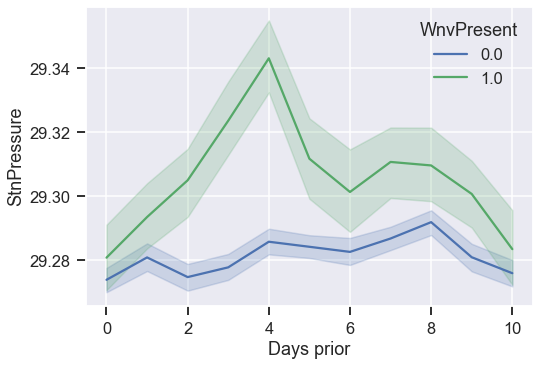

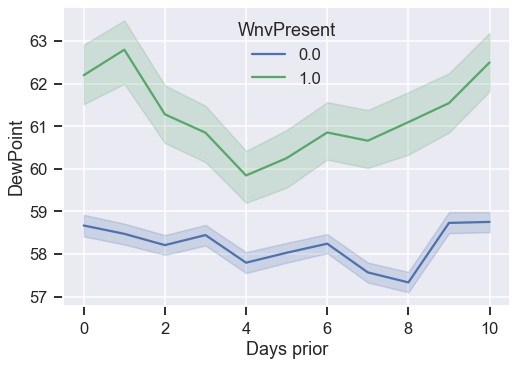

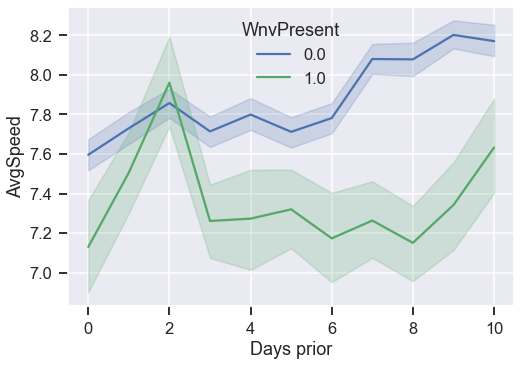

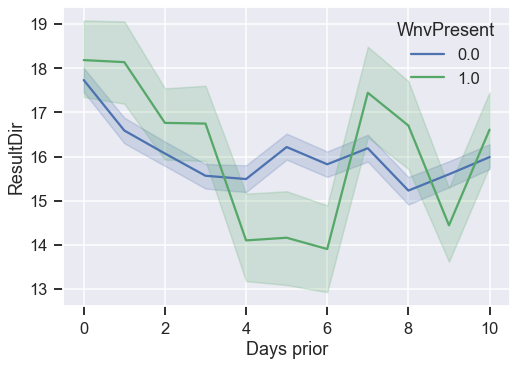

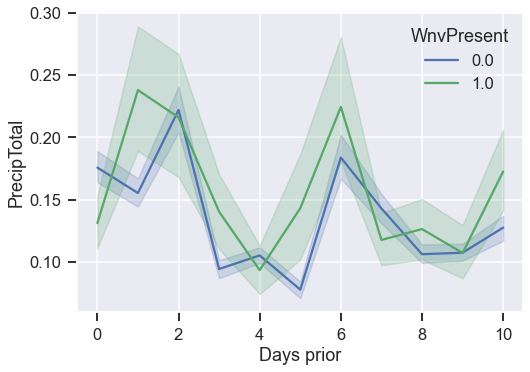

In [65]:
for c in ['Tmin','Tavg','Tmax','StnPressure','DewPoint','AvgSpeed', 'ResultDir', 'PrecipTotal']:
    cols = [c+j for j in suf]
    
    mapper = {k:v for v,k in enumerate(cols)}
    
    cols+=['Date','Trap']
    
    
    long = pd.melt(train[cols], id_vars=['Date','Trap'])
    long['variable'] = pd.to_numeric(long['variable'].map(mapper))
    long = pd.merge(long,train[['Date','Trap','WnvPresent']],on=['Date','Trap'])
    
    sns.lineplot(data=long,x='variable',y='value', hue='WnvPresent')
    plt.ylabel(c)
    plt.xlabel('Days prior')
    plt.show()

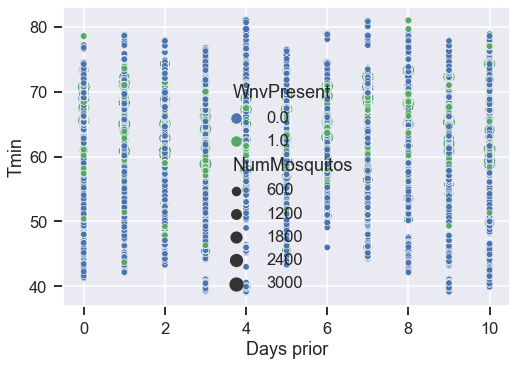

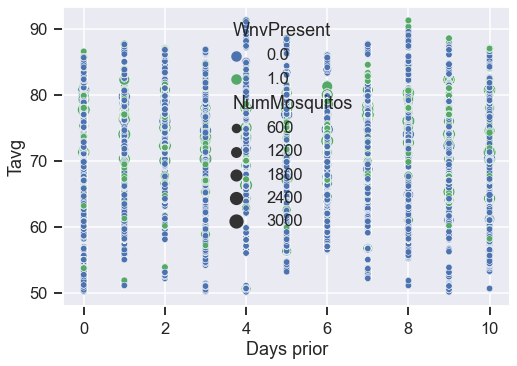

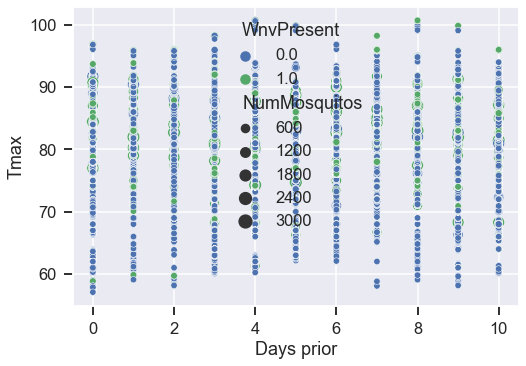

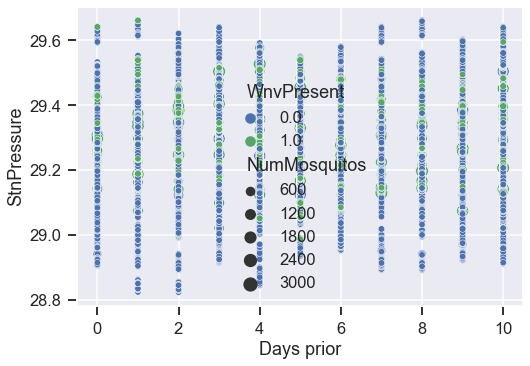

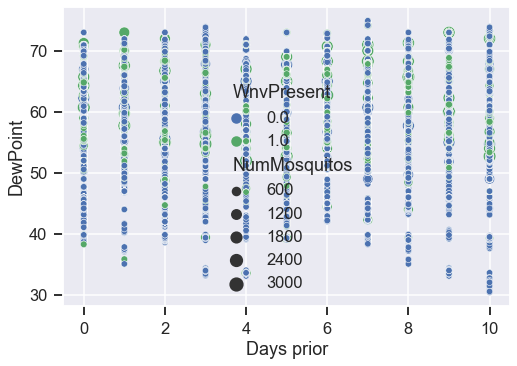

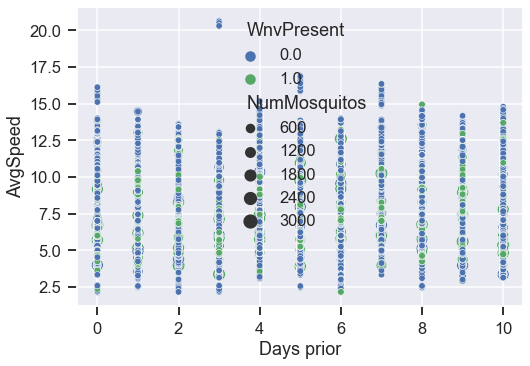

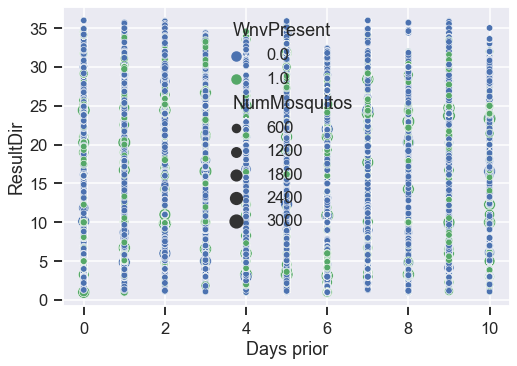

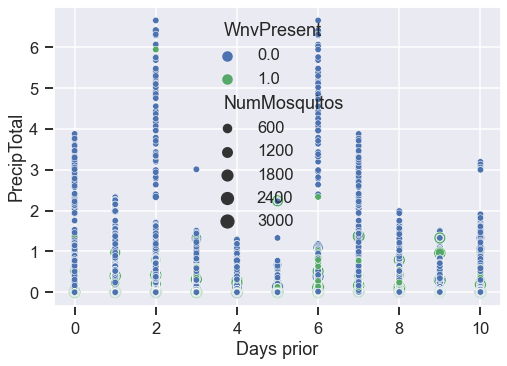

In [62]:
for c in ['Tmin','Tavg','Tmax','StnPressure','DewPoint','AvgSpeed', 'ResultDir', 'PrecipTotal']:
    cols = [c+j for j in suf]
    
    mapper = {k:v for v,k in enumerate(cols)}
    
    cols+=['Date','Trap']
    
    
    long = pd.melt(train[cols], id_vars=['Date','Trap'])
    long['variable'] = pd.to_numeric(long['variable'].map(mapper))
    long = pd.merge(long,train[['Date','Trap','NumMosquitos','WnvPresent']],on=['Date','Trap'])
    
    sns.scatterplot(data=long,x='variable',y='value', size='NumMosquitos', hue='WnvPresent')
    plt.ylabel(c)
    plt.xlabel('Days prior')
    plt.show()

Some observations here. 
- There is a big difference in the distributions of + & - cases in the temperature features of that day and the last 3-4 days in the past.  beyond 4 days in the past the temperature features seem less significant
- The same is true for the `WetBulb` feature.
- A lower average wind speed appears in the preceding days appears to be correlated with a + case
- Wind direction and precipitation are harder to interpret on these plots

Let's dig into precipitation a bit more. 

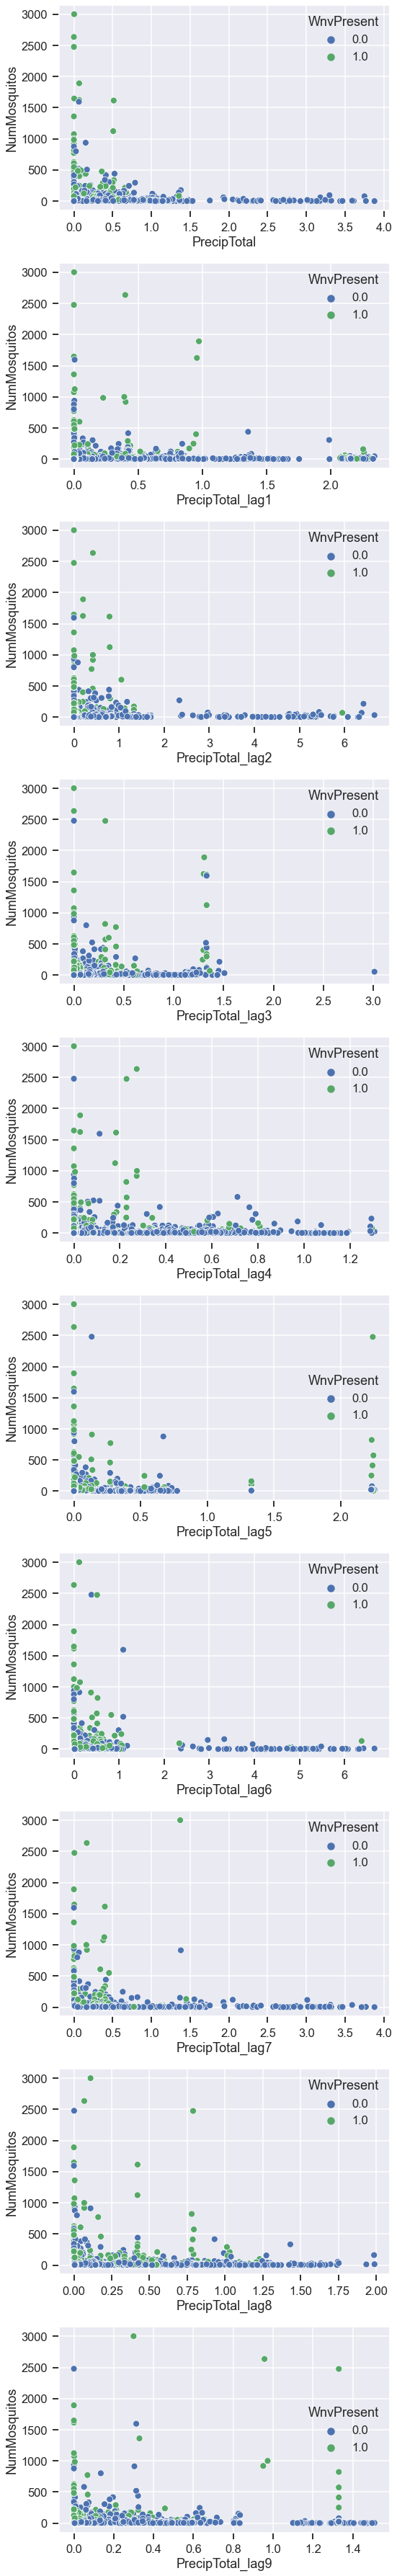

In [57]:
days=10
feature='PrecipTotal'

col = [feature] + [feature+f'_lag{i}' for i in range(1,days)]

fig,ax = plt.subplots(days,1,figsize=(8,5*days), tight_layout=True)
for j in range(days):
    
    sns.scatterplot(data=train, x= col[j], y='NumMosquitos', hue='WnvPresent', ax=ax[j])
    
plt.show()

The above plots show a scatter plot for number of mosquitos versus precipitation colored by + case for the day of collection and previous 10 days.  When looking at the lagged days, it seems like there are certain big events (with many traps reporting similarly high precipitation) that lead to many positive cases.  Perhaps these are thuderstorms that are coded in the data? Let's look

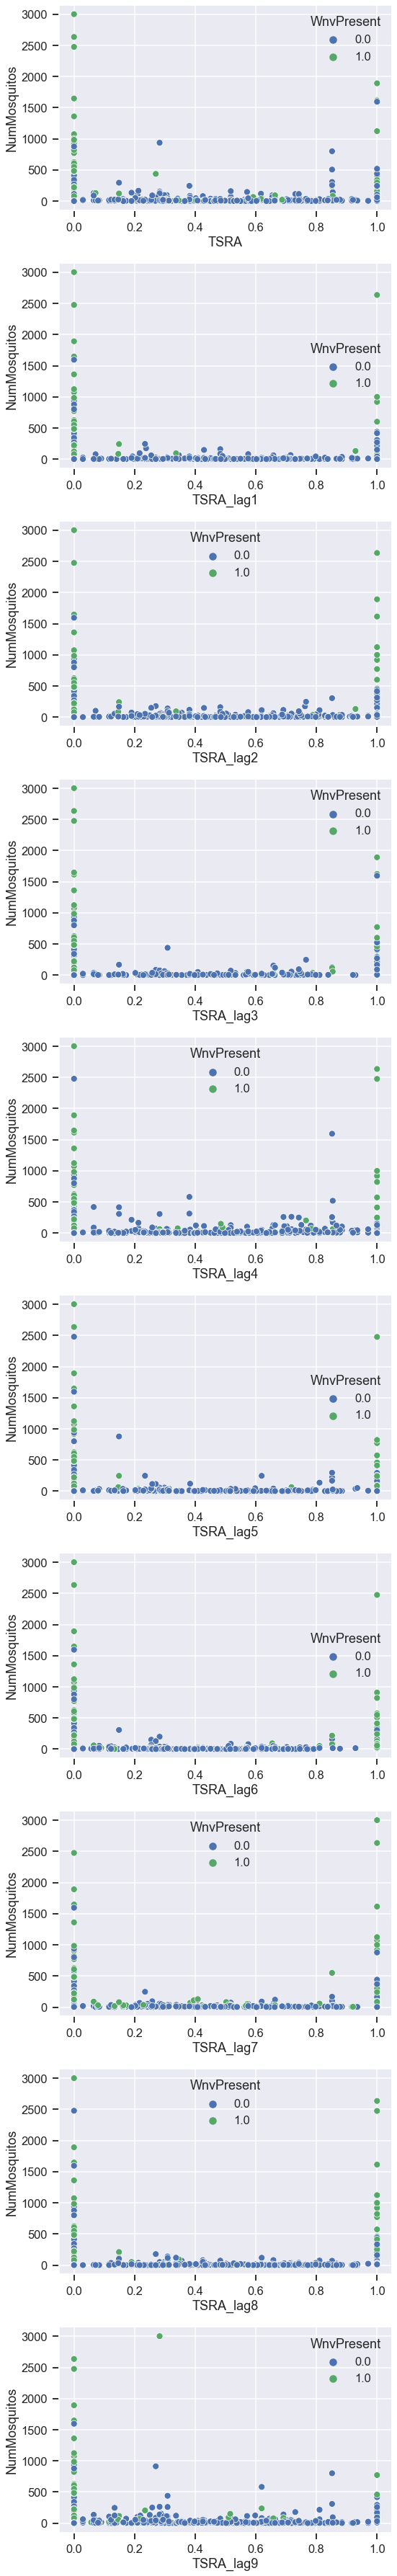

In [58]:
days=10
feature='TSRA'

col = [feature] + [feature+f'_lag{i}' for i in range(1,days)]

fig,ax = plt.subplots(days,1,figsize=(8,5*days), tight_layout=True)
for j in range(days):
    
    sns.scatterplot(data=train, x= col[j], y='NumMosquitos', hue='WnvPresent', ax=ax[j])
    
plt.show()

Aha! it looks like `TSRA`, a code for a thunderstorm, is a useful feature.  It looks like there are is a cluster of + cases when the there is a high value for the `TSRA` lagged features (indicating the trap is close to a weather station that registered a thunderstorm).  The relationship above for `TSRA` is clearly non-linear.  I will be sure to use a non-linear model for predicting WNV+.

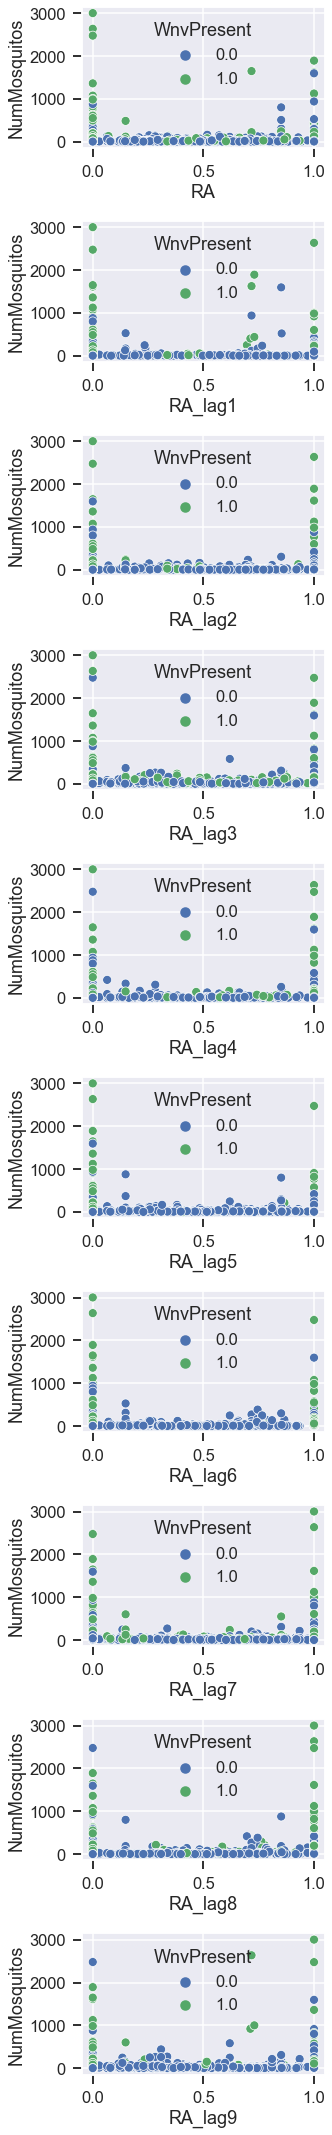

In [55]:
days=10
feature='RA'

col = [feature] + [feature+f'_lag{i}' for i in range(1,days)]

fig,ax = plt.subplots(days,1,figsize=(5,3*days), tight_layout=True)
for j in range(days):
    
    sns.scatterplot(data=train, x= col[j], y='NumMosquitos', hue='WnvPresent', ax=ax[j])
    
plt.show()

`RA`, rain events, looks similar, but I think it is less significant.  There are more positive cases in the middle range of values for `RA`

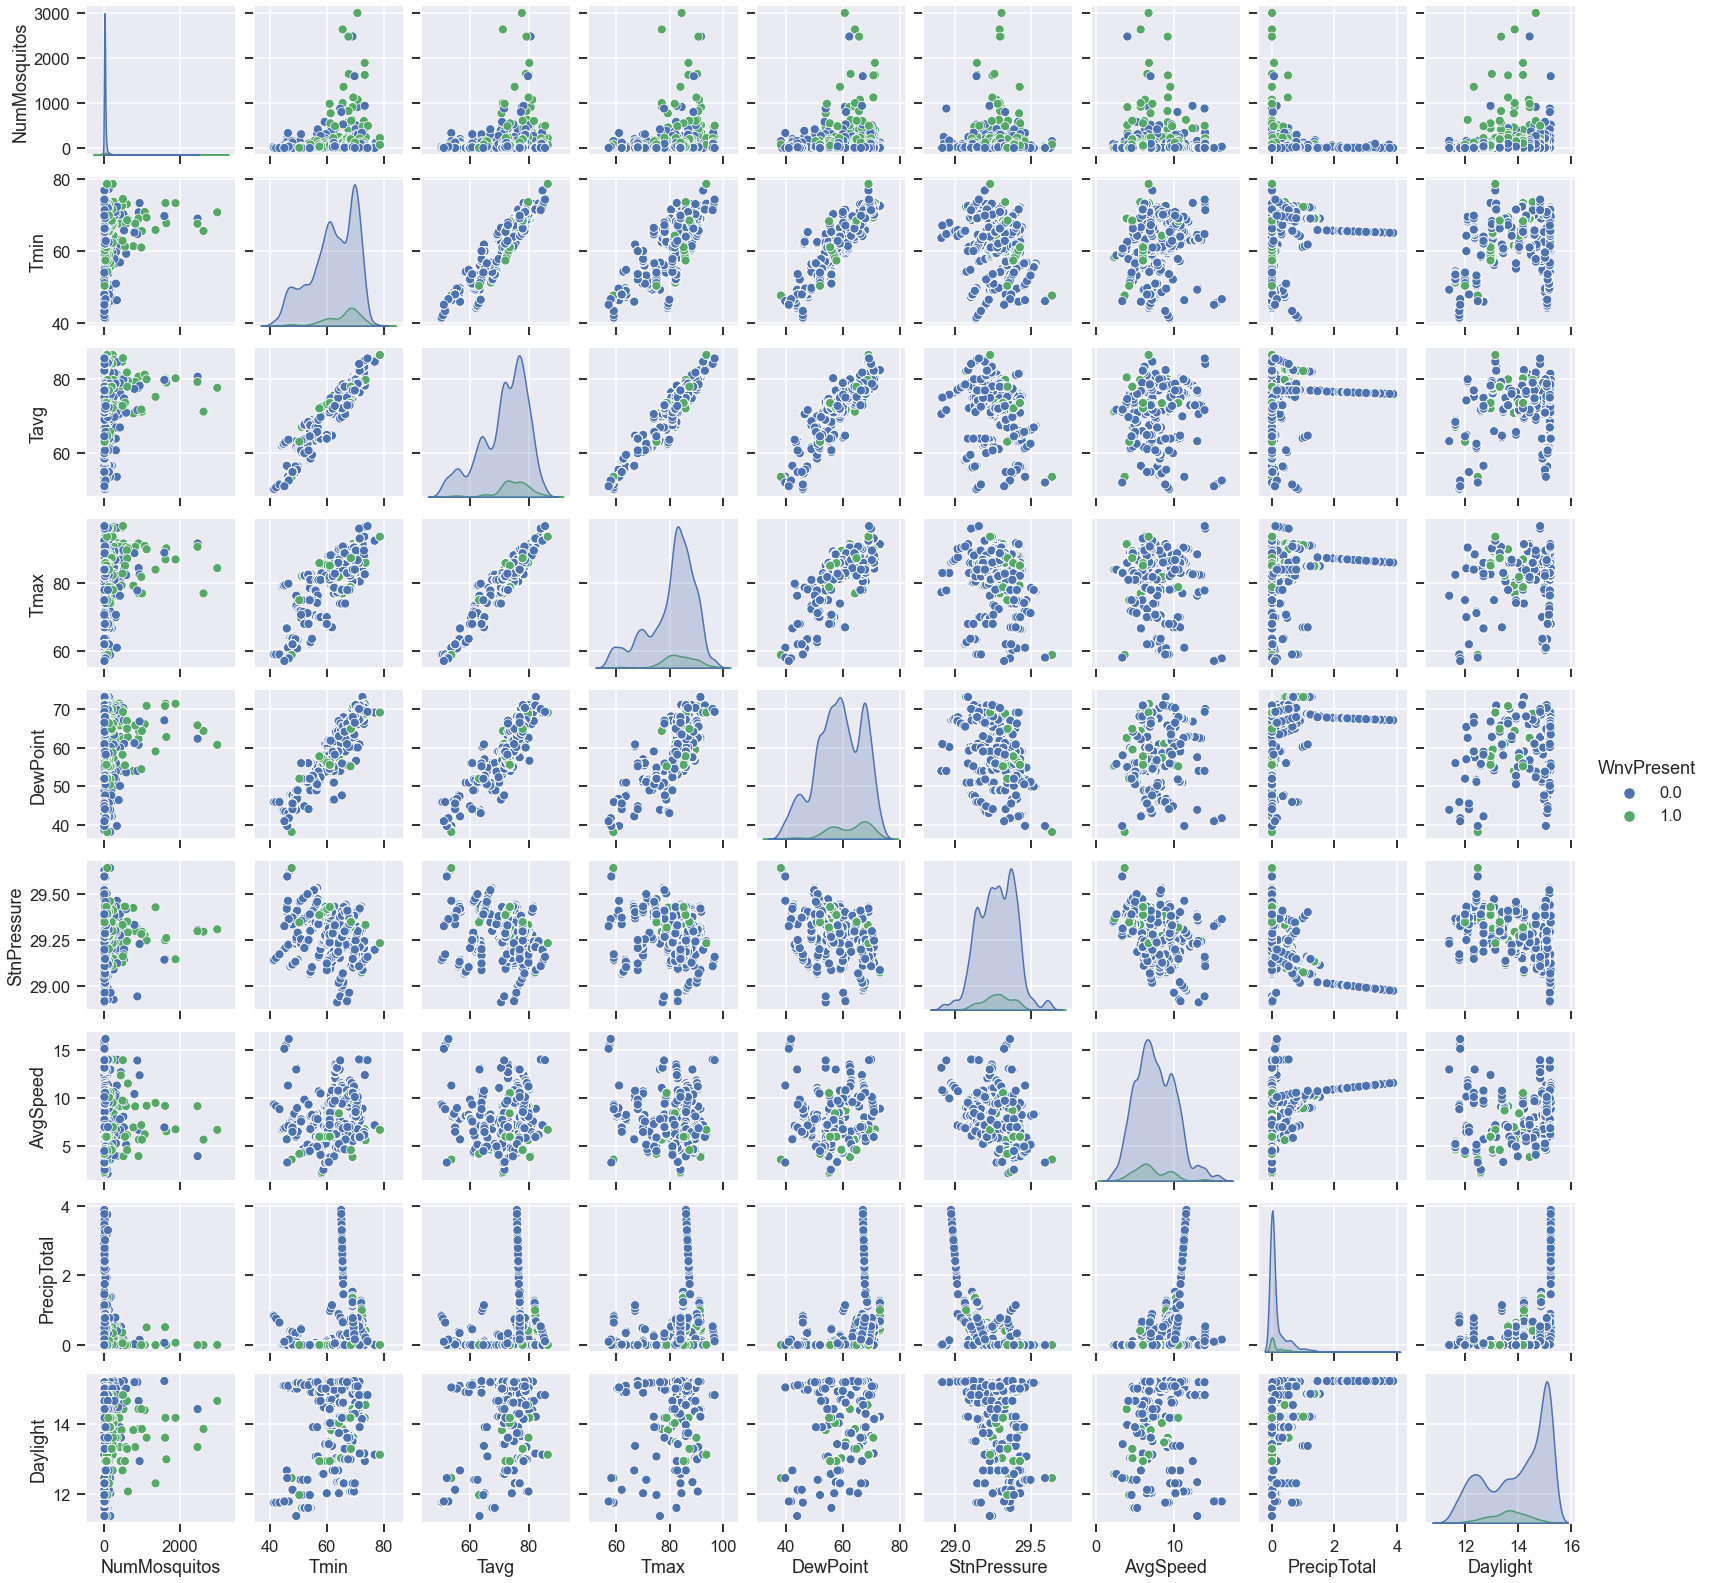

In [67]:
sns.pairplot(train[['WnvPresent','NumMosquitos','Tmin','Tavg','Tmax','DewPoint','StnPressure','AvgSpeed','PrecipTotal','Daylight']],hue='WnvPresent')
plt.show()

## Integration with spray data

In [68]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14194 entries, 0 to 14193
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dateTime   14194 non-null  datetime64[ns]
 1   Latitude   14194 non-null  float64       
 2   Longitude  14194 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 332.8 KB


In [69]:
spray.dateTime.dt.year.unique()

array([2011, 2013], dtype=int64)

The spray data is only available for 2011 and 2013, 2 of the summers in the training set and none in the test set. Let's see if I can find any effect from spraying in 2011 and 2013.


In [70]:
### subset train data
df = train.loc[train.Date.dt.year.isin([2011,2013]), ['Date', 'Trap','Latitude','Longitude','NumMosquitos','WnvPresent']].copy()
df

Date   Trap   Latitude  Longitude  NumMosquitos  WnvPresent
2465 2011-06-10   T003  41.964242 -87.757639             3         0.0
2466 2011-06-10   T013  41.923738 -87.785288             2         0.0
2467 2011-06-10   T017  41.960616 -87.777189             2         0.0
2468 2011-06-10   T018  42.010412 -87.662140             7         0.0
2469 2011-06-10   T027  41.984809 -87.728492             3         0.0
...         ...    ...        ...        ...           ...         ...
4611 2013-09-26   T233  42.009876 -87.807277             5         0.0
4612 2013-09-26   T235  41.776428 -87.627096             1         0.0
4613 2013-09-26   T900  41.974689 -87.890615            80         1.0
4614 2013-09-26  T035a  41.763733 -87.742302             6         1.0
4615 2013-09-26  T009a  41.992478 -87.862995             1         0.0

[2151 rows x 6 columns]

Unkowns: 
1. Effective proximity of a mosquito spray
1. Effective time frame spray (how many days before is the spray effective?)

I will isolate the instances of a spray coinciding with a trap switching from positive on one record to negative on the next.  The proven effective sprays.  Then I will use this table to determine how I can create a new feature for the training data.

In [71]:
### Cross join, and then I will filter out rows based on datetime
df = pd.merge(df, spray, how='cross', suffixes=('','_spray'))

### Create date difference to between spray and trap records
df['date_diff_days'] = df['Date'] - df['dateTime']
df['date_diff_days'] = df['date_diff_days'].dt.days
### limit to spray that occurs in the 30 days before a trap is recorded
df = df[ (df['date_diff_days'] >= -15) & (df['date_diff_days'] <= 15) ]

### Create distance feature between spray and trap
df['distance'] = Haversine(df['Latitude'], df['Longitude'], df['Latitude_spray'], df['Longitude_spray'])
#df = df[df['distance'] < .25 ]

df.shape

(4973443, 11)

In [72]:
traps = df.groupby(['Date','Trap'])[['WnvPresent','date_diff_days','distance']].agg({'WnvPresent':'mean', 'date_diff_days':'mean','distance':['min','mean']})
traps.columns = ['WnvPresent','daysBefore','distanceMin','distanceMean']
traps.head()

WnvPresent  daysBefore  distanceMin  distanceMean
Date       Trap                                                   
2011-08-26 T002         0.0       -13.0     0.950211      2.062212
           T003         0.0       -13.0     1.596820      2.999822
           T008         0.0       -13.0     1.589738      2.519053
           T011         0.0       -13.0     1.951966      2.914595
           T012         0.0       -13.0     2.138415      3.334172

In [73]:
traps = traps.reset_index()
traps[traps.Trap=='T012']

Date  Trap  WnvPresent  daysBefore  distanceMin  distanceMean
4    2011-08-26  T012         0.0  -13.000000     2.138415      3.334172
74   2011-09-01  T012         0.0   -7.000000     2.138415      3.334172
125  2011-09-12  T012         0.0    4.000000     2.138415      3.334172
193  2011-09-16  T012         0.0    8.000000     2.138415      3.334172
317  2013-07-08  T012         0.0  -10.000000     0.967890     14.511580
386  2013-07-12  T012         0.0   -9.379600     0.967890      9.595568
458  2013-07-19  T012         0.0   -2.379600     0.967890      9.595568
530  2013-07-25  T012         0.0   -0.830766     0.967890      8.475499
602  2013-08-01  T012         0.0   -1.197339     0.967890      7.283673
672  2013-08-08  T012         0.0   -3.712420     1.725819      6.249492
745  2013-08-15  T012         0.0   -5.448625     2.469675      8.126454
815  2013-08-22  T012         1.0   -0.183169     2.255276      7.649328
887  2013-08-29  T012         0.0    4.749934     2.255276      8.078805
959  2013-09-06  T012         0.0    7.964263     2.255276      9.908662
1029 2013-09-12  T012         0.0   10.995040     2.255276      8.394262
1098 2013-09-19  T012         1.0   13.000000     2.255276      3.573624

In [74]:
traps = traps.set_index(['Trap','Date']).sort_index()
traps.head(10)

WnvPresent  daysBefore  distanceMin  distanceMean
Trap Date                                                         
T002 2011-08-26         0.0  -13.000000     0.950211      2.062212
     2011-09-01         0.0   -7.000000     0.950211      2.062212
     2011-09-12         0.0    4.000000     0.950211      2.062212
     2011-09-16         0.0    8.000000     0.950211      2.062212
     2011-09-23         1.0   15.000000     0.950211      2.062212
     2013-07-08         0.0  -10.000000     3.432204     14.010571
     2013-07-12         0.0   -9.379600     3.160906      9.803938
     2013-07-19         0.0   -2.379600     3.160906      9.803938
     2013-07-25         0.0   -0.830766     3.160906      8.800734
     2013-08-01         0.0   -1.197339     0.158991      6.552553

In [75]:
traps['shift_wnv'] = traps['WnvPresent'].shift(1)
traps['shift_days'] = traps['daysBefore'].shift(1)
traps.head()

WnvPresent  daysBefore  distanceMin  distanceMean  shift_wnv  \
Trap Date                                                                       
T002 2011-08-26         0.0       -13.0     0.950211      2.062212        NaN   
     2011-09-01         0.0        -7.0     0.950211      2.062212        0.0   
     2011-09-12         0.0         4.0     0.950211      2.062212        0.0   
     2011-09-16         0.0         8.0     0.950211      2.062212        0.0   
     2011-09-23         1.0        15.0     0.950211      2.062212        0.0   

                 shift_days  
Trap Date                    
T002 2011-08-26         NaN  
     2011-09-01       -13.0  
     2011-09-12        -7.0  
     2011-09-16         4.0  
     2011-09-23         8.0

In [76]:
traps['spray_worked'] = np.where((traps.WnvPresent==1) & (traps.shift_wnv==0) & (traps.daysBefore>0) & (traps.shift_days<0), 1, 0 )
traps['spray_not_worked'] = np.where((traps.WnvPresent==1) & (traps.shift_wnv==1) & (traps.daysBefore>0) & (traps.shift_days<0), 1, 0 )
traps['spray_control_group'] = np.where((traps.daysBefore>0) & (traps.shift_days<0), 1, 0 )

In [77]:
traps[traps.spray_worked==1]

WnvPresent  daysBefore  distanceMin  distanceMean  \
Trap  Date                                                            
T008  2013-08-29         1.0    4.749934     0.867058      8.946397   
T009a 2013-08-29         1.0    4.749934     1.198787     10.085650   
T031  2013-08-29         1.0    4.749934     1.714991      8.787099   
T039  2011-09-12         1.0    4.000000     5.046554      6.496582   
      2013-08-29         1.0    4.749934     1.021090      6.153160   
T089  2013-08-29         1.0    4.749934     1.430447     13.015093   
T090  2013-08-29         1.0    4.749934     2.088274      7.705677   
T095  2013-08-29         1.0    4.749934     3.772337     13.675096   
T114  2013-08-29         1.0    4.749934     0.913464      8.658716   
T128  2013-08-29         1.0    4.749934     1.609969     16.035308   
T155  2013-08-29         1.0    4.749934     1.949377     10.079638   
T159  2013-08-29         1.0    4.749934     1.435886     12.477824   
T218  2011-09-12         1.0    4.000000     3.284292      4.726783   
T221  2013-08-29         1.0    4.749934     4.784669     19.337800   
T222  2013-08-29         1.0    4.749934     0.822909      6.061838   
T230  2011-09-12         1.0    4.000000     4.747610      6.085226   

                  shift_wnv  shift_days  spray_worked  spray_not_worked  \
Trap  Date                                                                
T008  2013-08-29        0.0   -0.183169             1                 0   
T009a 2013-08-29        0.0   -0.183169             1                 0   
T031  2013-08-29        0.0   -0.183169             1                 0   
T039  2011-09-12        0.0   -7.000000             1                 0   
      2013-08-29        0.0   -0.183169             1                 0   
T089  2013-08-29        0.0   -0.183169             1                 0   
T090  2013-08-29        0.0   -0.183169             1                 0   
T095  2013-08-29        0.0   -0.183169             1                 0   
T114  2013-08-29        0.0   -0.183169             1                 0   
T128  2013-08-29        0.0   -0.183169             1                 0   
T155  2013-08-29        0.0   -0.183169             1                 0   
T159  2013-08-29        0.0   -0.183169             1                 0   
T218  2011-09-12        0.0  -13.000000             1                 0   
T221  2013-08-29        0.0   -0.183169             1                 0   
T222  2013-08-29        0.0   -0.183169             1                 0   
T230  2011-09-12        0.0   -7.000000             1                 0   

                  spray_control_group  
Trap  Date                             
T008  2013-08-29                    1  
T009a 2013-08-29                    1  
T031  2013-08-29                    1  
T039  2011-09-12                    1  
      2013-08-29                    1  
T089  2013-08-29                    1  
T090  2013-08-29                    1  
T095  2013-08-29                    1  
T114  2013-08-29                    1  
T128  2013-08-29                    1  
T155  2013-08-29                    1  
T159  2013-08-29                    1  
T218  2011-09-12                    1  
T221  2013-08-29                    1  
T222  2013-08-29                    1  
T230  2011-09-12                    1

In [78]:
traps[traps.spray_not_worked==1]

WnvPresent  daysBefore  distanceMin  distanceMean  shift_wnv  \
Trap Date                                                                       
T002 2013-08-29         1.0    4.749934     0.158991      6.936279        1.0   
T003 2011-09-12         1.0    4.000000     1.596820      2.999822        1.0   
     2013-08-29         1.0    4.749934     1.066286      6.928545        1.0   
T028 2013-08-29         1.0    4.749934     0.054214      8.457077        1.0   
T033 2013-08-29         1.0    4.749934     0.788775      6.574849        1.0   
T061 2013-09-06         1.0    7.964263     1.315453      8.283766        1.0   
T225 2013-08-29         1.0    4.749934     1.361347     11.268206        1.0   
T231 2013-08-29         1.0    4.749934     0.067261      9.056160        1.0   
T233 2013-08-29         1.0    4.749934     0.027654      9.294812        1.0   
T235 2013-08-29         1.0    4.749934     0.887436     11.035517        1.0   
T900 2011-09-12         1.0    4.000000     2.775638      4.205924        1.0   
     2013-08-29         1.0    4.749934     2.280395     10.568569        1.0   

                 shift_days  spray_worked  spray_not_worked  \
Trap Date                                                     
T002 2013-08-29   -0.183169             0                 1   
T003 2011-09-12   -7.000000             0                 1   
     2013-08-29   -0.183169             0                 1   
T028 2013-08-29   -0.183169             0                 1   
T033 2013-08-29   -0.183169             0                 1   
T061 2013-09-06   -0.183169             0                 1   
T225 2013-08-29   -0.183169             0                 1   
T231 2013-08-29   -0.183169             0                 1   
T233 2013-08-29   -0.183169             0                 1   
T235 2013-08-29   -0.183169             0                 1   
T900 2011-09-12   -6.000000             0                 1   
     2013-08-29   -0.183169             0                 1   

                 spray_control_group  
Trap Date                             
T002 2013-08-29                    1  
T003 2011-09-12                    1  
     2013-08-29                    1  
T028 2013-08-29                    1  
T033 2013-08-29                    1  
T061 2013-09-06                    1  
T225 2013-08-29                    1  
T231 2013-08-29                    1  
T233 2013-08-29                    1  
T235 2013-08-29                    1  
T900 2011-09-12                    1  
     2013-08-29                    1

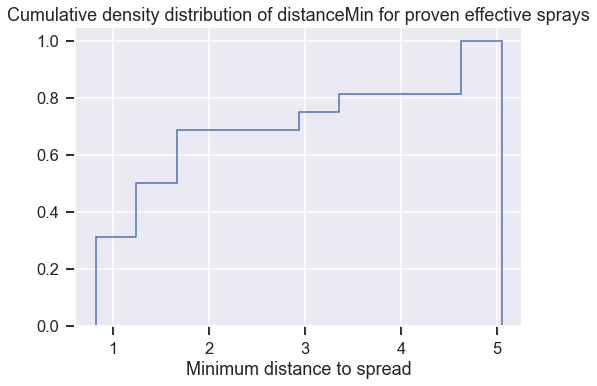

In [79]:
traps[traps.spray_worked==1]['distanceMin'].hist(cumulative=True, density=True, histtype='step')
plt.title('Cumulative density distribution of distanceMin for proven effective sprays')
plt.xlabel('Minimum distance to spread')
plt.show()

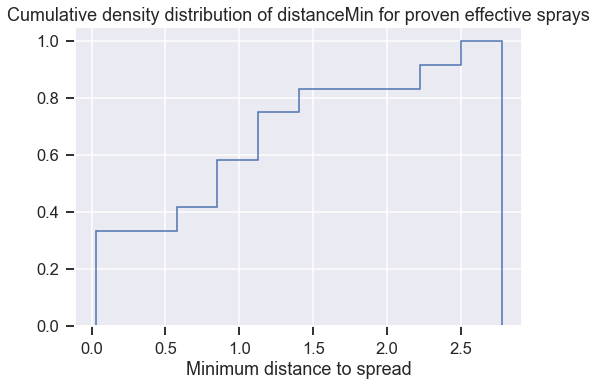

In [80]:
traps[traps.spray_not_worked==1]['distanceMin'].hist(cumulative=True, density=True, histtype='step')
plt.title('Cumulative density distribution of distanceMin for proven effective sprays')
plt.xlabel('Minimum distance to spread')
plt.show()

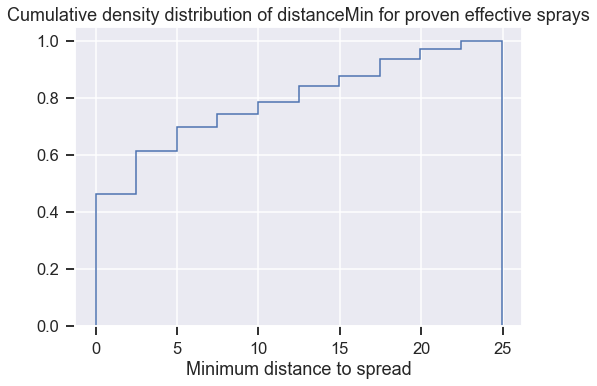

In [81]:
traps[traps.spray_control_group==1]['distanceMin'].hist(cumulative=True, density=True, histtype='step')
plt.title('Cumulative density distribution of distanceMin for proven effective sprays')
plt.xlabel('Minimum distance to spread')
plt.show()

Aha.  Now I have something.  The table above shows all of the times that spraying conincided to a change of a positive test at a trap to a negative test at the next sample.  It's not a large number of cases and so this will probably not be a very important feature, but here are a couple observations. 
- the spraying was done within 5 days before a trap was collected
- 75% of the effective sprays occured within a minimum distance of 2 miles.  80% within 4 miles.
Going forward I will create a binary column that indicates whether a trap has had a spray event within the last 5 days that is less than 3 miles away.  

<AxesSubplot:xlabel='daysBefore', ylabel='distanceMin'>

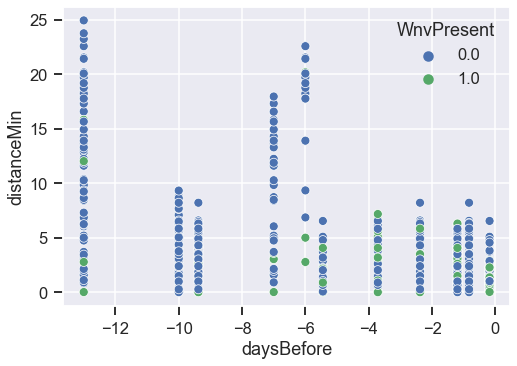

In [82]:
sns.scatterplot(data=traps[(traps.daysBefore<0) & (traps.daysBefore>-14)], x='daysBefore',y='distanceMin', hue='WnvPresent')

## Merge spray with train
create a feature in train that indicates if there was a spray in the last 5 days within 4 miles of the trap

In [83]:
spray.dateTime.dt.year.unique()

array([2011, 2013], dtype=int64)

In [84]:
df = train.loc[train.Date.dt.year.isin(spray.dateTime.dt.year.unique()),['Date','Trap','Latitude','Longitude']].copy()

df = pd.merge(df, spray, how='cross', suffixes=('','_spray'))

df['daysBefore'] = df['Date'] - df['dateTime']
df['daysBefore'] = df['daysBefore'].dt.days

df = df[(df.daysBefore <= 10) & (df.daysBefore > 0)]

df.shape

(1259979, 8)

In [85]:
df['distance'] = Haversine(df.Latitude, df.Longitude, df.Latitude_spray, df.Longitude_spray)
df = df[df.distance <= 4]
print(df.shape)
df.head()

(214122, 9)


Date  Trap  Latitude  Longitude            dateTime  \
10773246 2011-09-12  T002  41.95469 -87.800991 2011-09-07 19:42:12   
10773247 2011-09-12  T002  41.95469 -87.800991 2011-09-07 19:42:22   
10773248 2011-09-12  T002  41.95469 -87.800991 2011-09-07 19:42:32   
10773249 2011-09-12  T002  41.95469 -87.800991 2011-09-07 19:42:42   
10773250 2011-09-12  T002  41.95469 -87.800991 2011-09-07 19:42:52   

          Latitude_spray  Longitude_spray  daysBefore  distance  
10773246       41.982767       -87.788192           4  2.046887  
10773247       41.982727       -87.788737           4  2.035452  
10773248       41.982743       -87.789485           4  2.025009  
10773249       41.982742       -87.790277           4  2.013419  
10773250       41.982753       -87.791015           4  2.004175

In [86]:
df['spray_last5'] = np.where(df.daysBefore < 5,1, 0)
df['spray_last10'] = np.where(df.daysBefore >= 5, 1, 0)
df = df.groupby(['Date','Trap'])[['spray_last5','spray_last10']].max().reset_index()
df.tail()

Date  Trap  spray_last5  spray_last10
237 2013-09-12  T027            0             1
238 2013-09-12  T223            0             1
239 2013-09-12  T233            0             1
240 2013-09-12  T236            0             1
241 2013-09-12  T900            0             1

In [87]:
train = pd.merge(train, df, how='left', left_on=['Date','Trap'], right_on=['Date','Trap'], validate='1:1').fillna(0)

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4616 entries, 0 to 4615
Columns: 338 entries, Date to spray_last10
dtypes: UInt32(1), datetime64[ns](1), float64(327), int64(5), object(4)
memory usage: 11.9+ MB


Training set looks pretty good. In the next notebook I will prepare the data for modelling and model.

In [89]:
train.to_csv('train_merged.csv')

# Fin